In [1]:
import os
import sys
import json
import pickle
import matplotlib.pyplot as plt
import pandas as pd

# Switch to parent path to import local module
parent_path = str(os.getcwd()).split('notebooks')[0] # zeosyn_gen
os.chdir(parent_path)
print('Switched directory to:', os.getcwd())

import torch
import data.utils as utils
sys.modules['utils'] = utils # Way to get around relative imports in utils for ZeoSynGen_dataset # https://stackoverflow.com/questions/2121874/python-pickling-after-changing-a-modules-directory
from eval import load_model, get_prediction_and_ground_truths, eval_zeolite_aggregated, eval_zeolite_osda, eval_single_system, get_metric_dataframes
from data.metrics import maximum_mean_discrepancy, wasserstein_distance
from models.diffusion import *

Switched directory to: /home/jupyter/Elton/Zeolites/zeosyn_gen


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics_eq/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics_eq/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model_type = 'diff'
fname = 'v3'
split = 'system'

In [3]:
# Load configs
with open(f'runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs = json.load(f)
with open(f"runs/{model_type}/{split}/{fname}/train_loss_list.pkl", 'rb') as f: # load dataset
    train_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/val_loss_list.pkl", 'rb') as f: # load dataset
    val_loss_list = pickle.load(f)

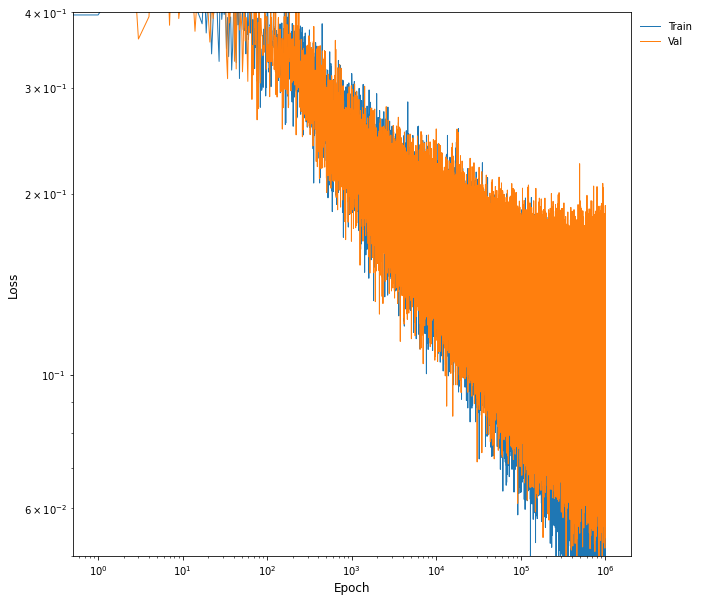

In [4]:
# Train/val loss fig
plt.figure(figsize=(10,10))
plt.plot(range(len(train_loss_list)), train_loss_list, label = 'Train')
plt.plot(range(len(val_loss_list)), val_loss_list, label = 'Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xscale('log')
plt.yscale('log')
# plt.ylim(0,1.1*train_loss_list[0])
plt.ylim(0.05,0.4)
plt.show()

In [5]:
model, configs = load_model(model_type, fname, split)
syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset = get_prediction_and_ground_truths(model, configs, cond_scale=0.75)
# mmd_zeo_agg_df, wsd_zeo_agg_df = eval_zeolite_aggregated(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs)
# mmd_zeo_osda_df, wsd_zeo_osda_df = eval_zeolite_osda(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs)

Loading model and configs...
Getting model predictions and grouth truths...
SYSTEMS:
train+val: 1856 test: 464

n_datapoints:
train: 14749 val: 2107 test: 5168
Loading synthetic predictions from saved predictions...


# 1) Overall aggregated

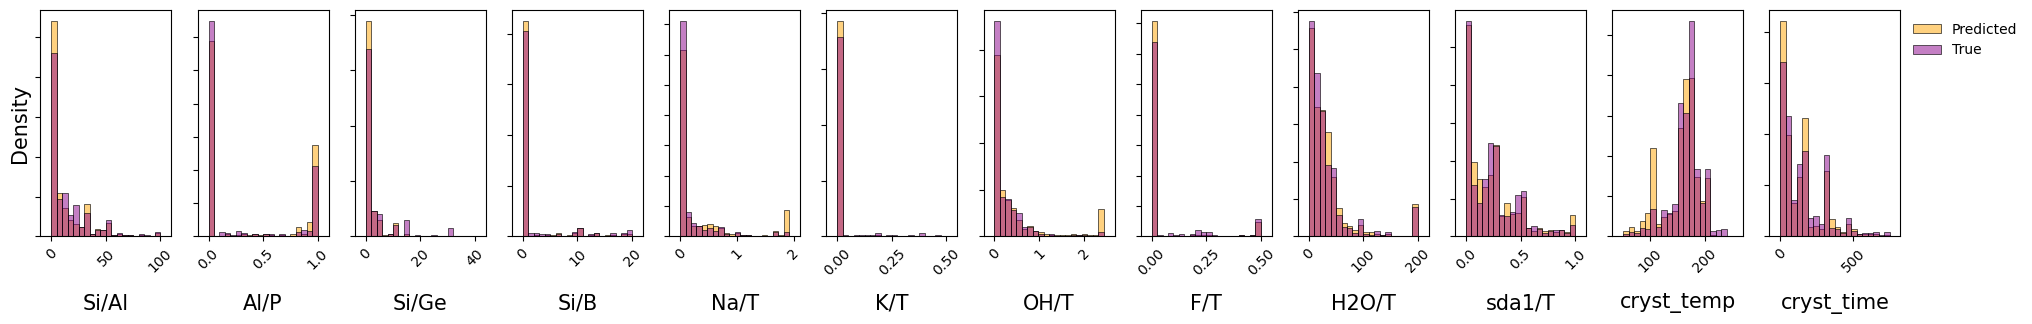

In [47]:
utils.compare_gel_conds([syn_pred, syn_true], ['Predicted', 'True'], [False, False], [True, True], ['orange', 'darkmagenta'], common_norm=True, alpha=0.5, 
                                                                    xlims={
                                                                            'Si/Al': {'min': 0., 'max': 100.},
                                                                            'Al/P': {'min': 0., 'max': 1.},
                                                                            'Si/Ge': {'min': 0., 'max': 40.},
                                                                            'Si/B': {'min': 0., 'max': 20.},
                                                                            'K/T': {'min': 0., 'max': 0.5},
                                                                            'F/T': {'min': 0., 'max': 0.5},
                                                                            'sda1/T': {'min': 0., 'max': 1.},
                                                                            'cryst_temp': {'min': 50., 'max': 250}, 
                                                                            'cryst_time': {'min': 0., 'max': 750},
                                                                          },
                                                                    #  save_path='figs/diff_outputs_agg.pdf'
                                                                     )

# 2) System-splits

### A) Zeolite-aggregated systems

Calculating metrics for zeolite-aggregated systems...
CHA


MMD: 0.3386220932006836
WSD: 0.0948450222222337


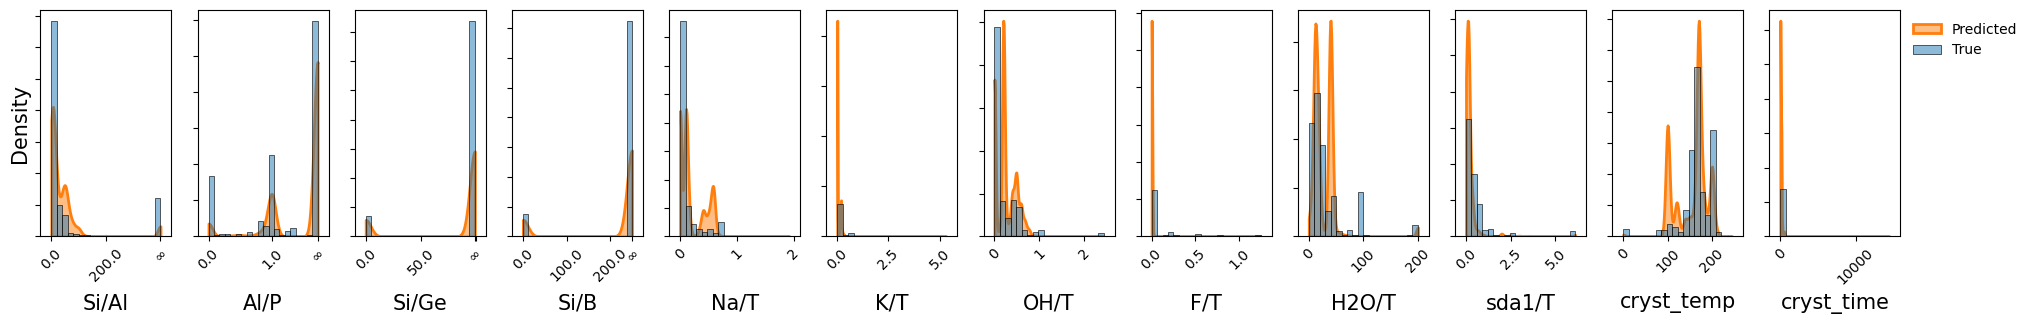

AEL
MMD: 1.188796043395996
WSD: 0.3064060400983838


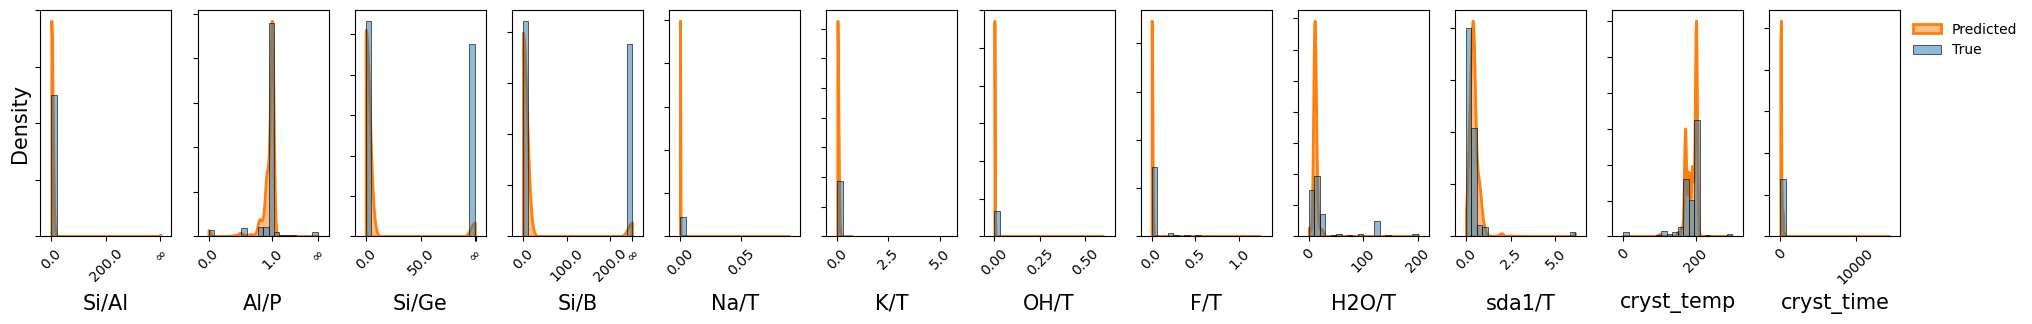

MFI
MMD: 0.13842105865478516
WSD: 0.026251742333500656


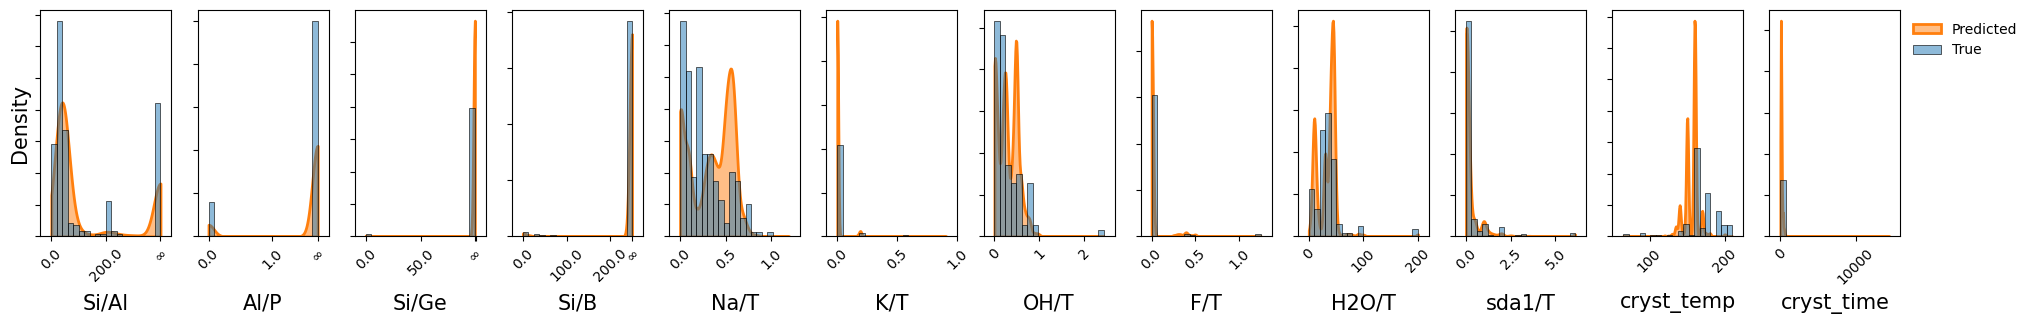

LTA
MMD: 0.425656795501709
WSD: 0.15070182674907548


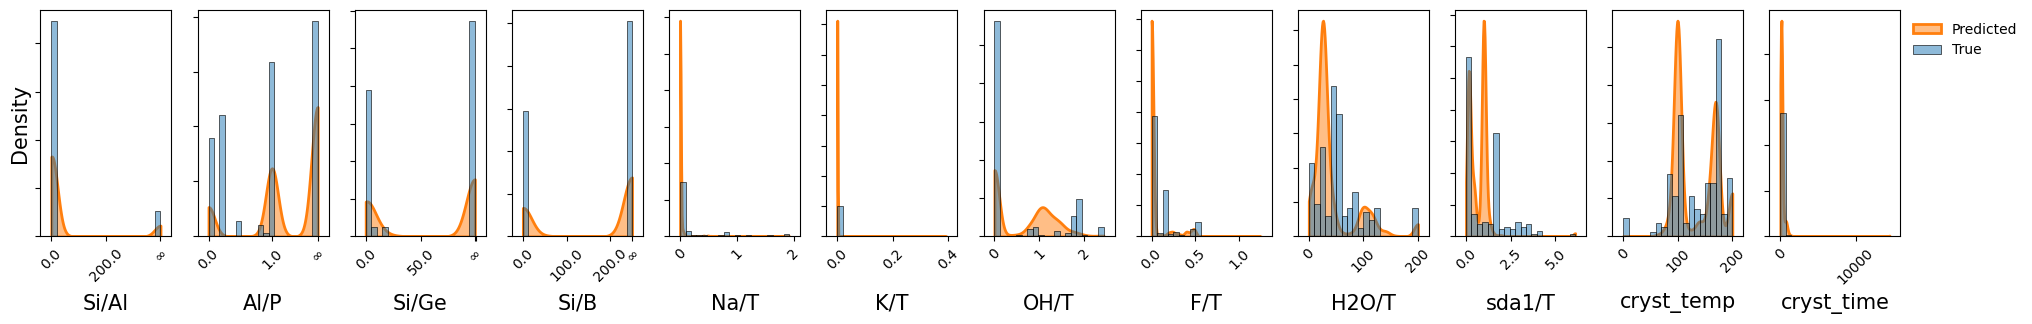

AFI
MMD: 0.20375919342041016
WSD: 0.1047167842818172


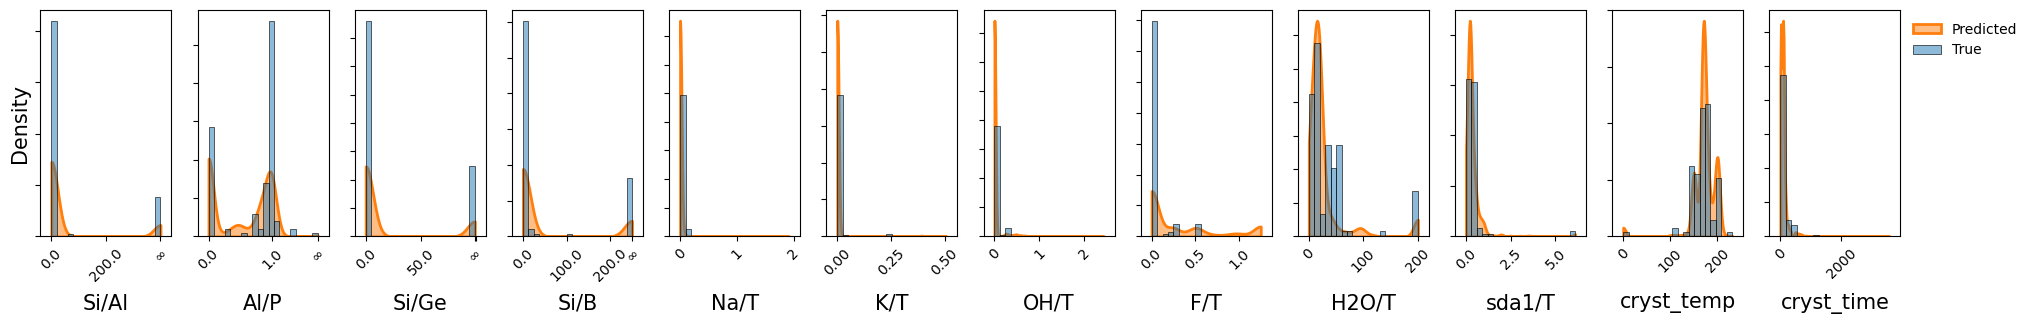

IWR
MMD: 0.5554304122924805
WSD: 0.16800205136338958


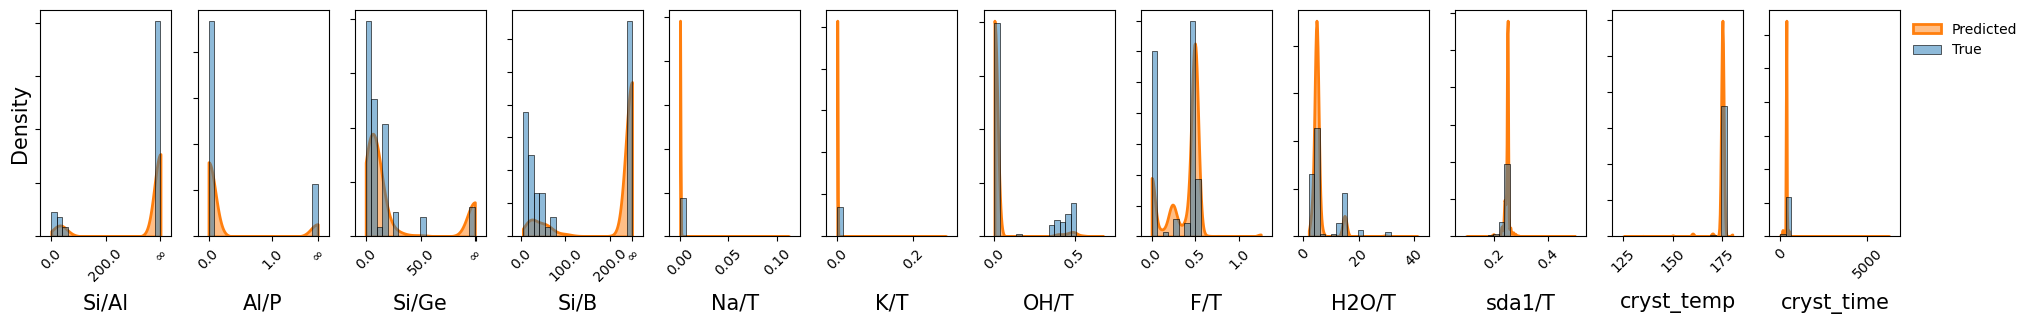

BEA
MMD: 0.09996891021728516
WSD: 0.03847465531946615


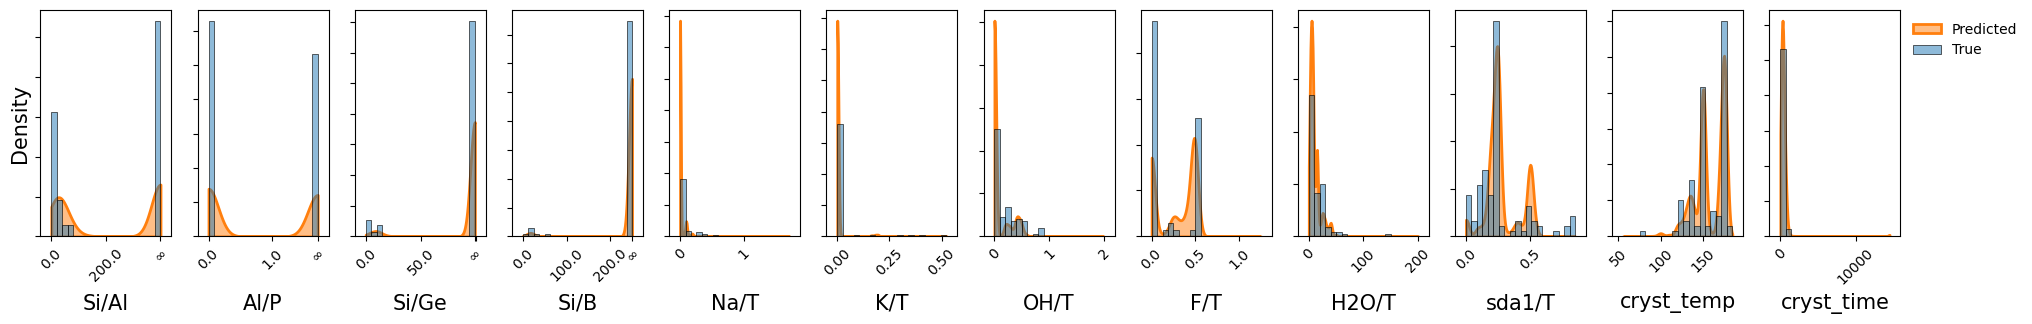

MTW
MMD: 0.1530132293701172
WSD: 0.05024246800036651


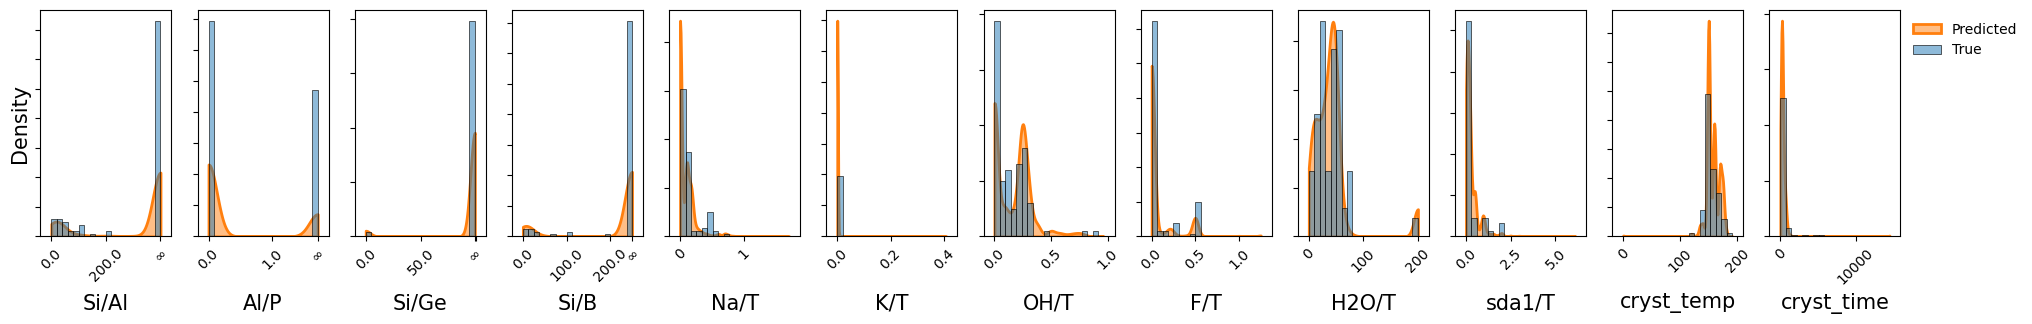

MEL
MMD: 0.808929443359375
WSD: 0.2901406314117103


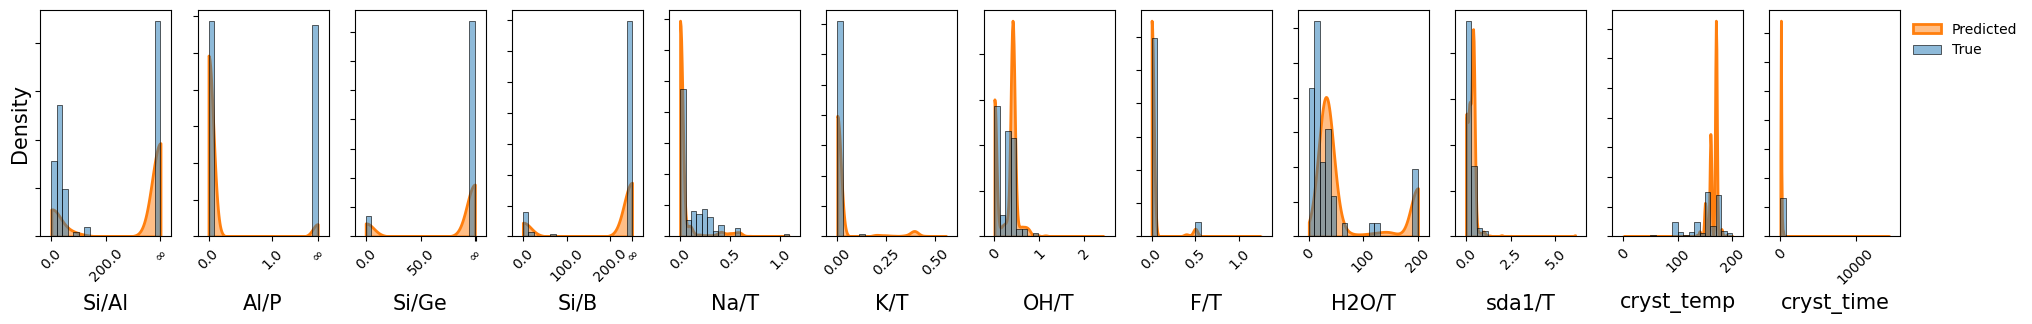

LEV
MMD: 0.27584362030029297
WSD: 0.12419903228397147


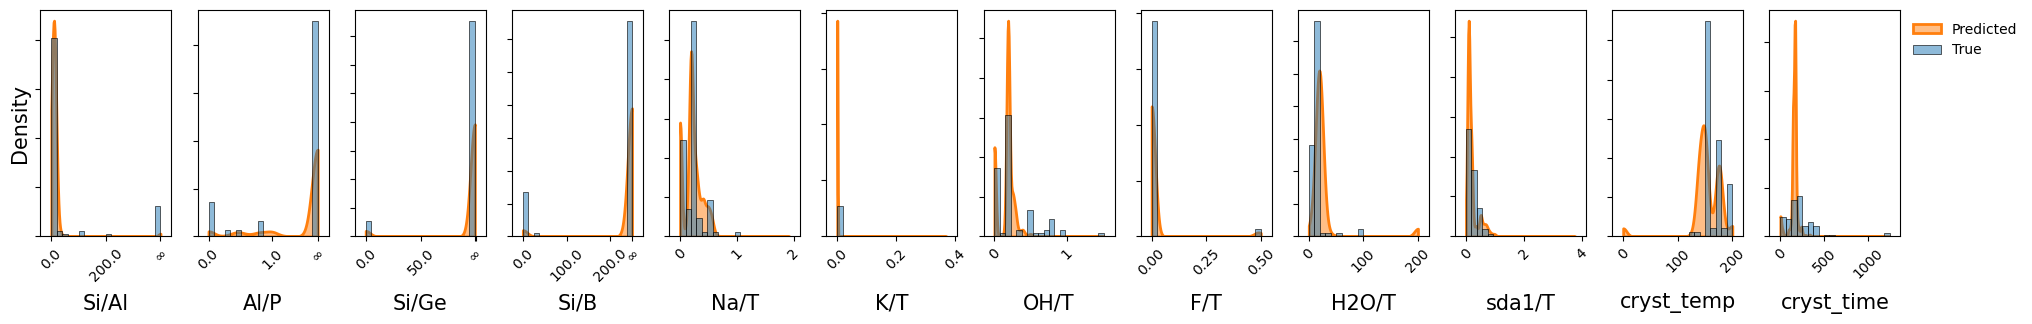

Mean MMD: 0.41884407997131345
Mean WSD: 0.13539802540639148


In [ ]:
_, _ = eval_zeolite_aggregated(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=10)

SAV
MMD: 2.0817151069641113
WSD: 0.8163403884128347


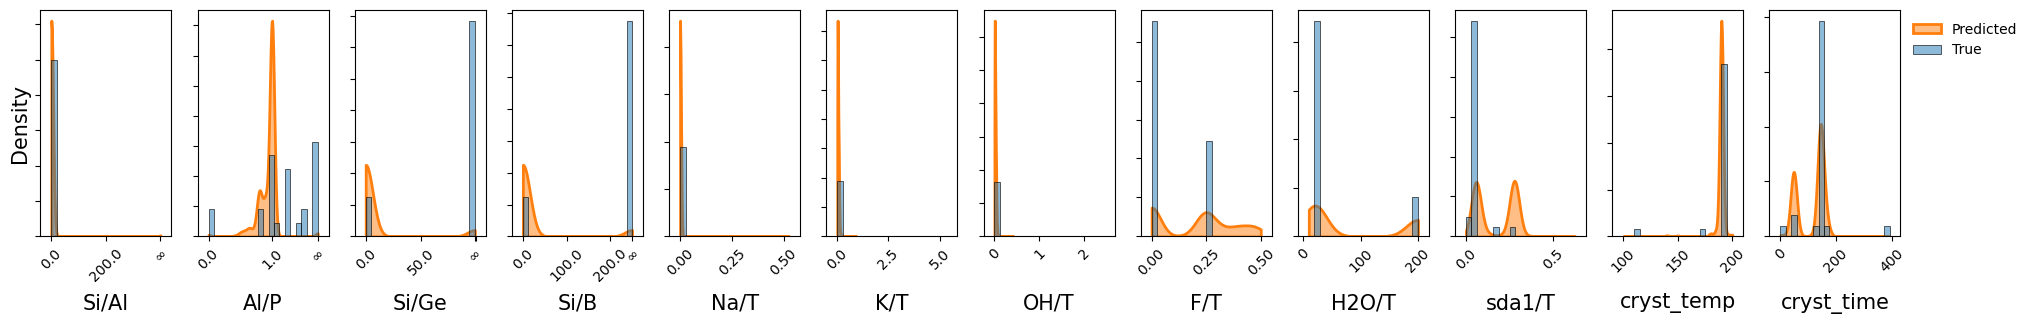

In [ ]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='SAV')

BEC
MMD: 0.054706573486328125
WSD: 0.020631404345344103


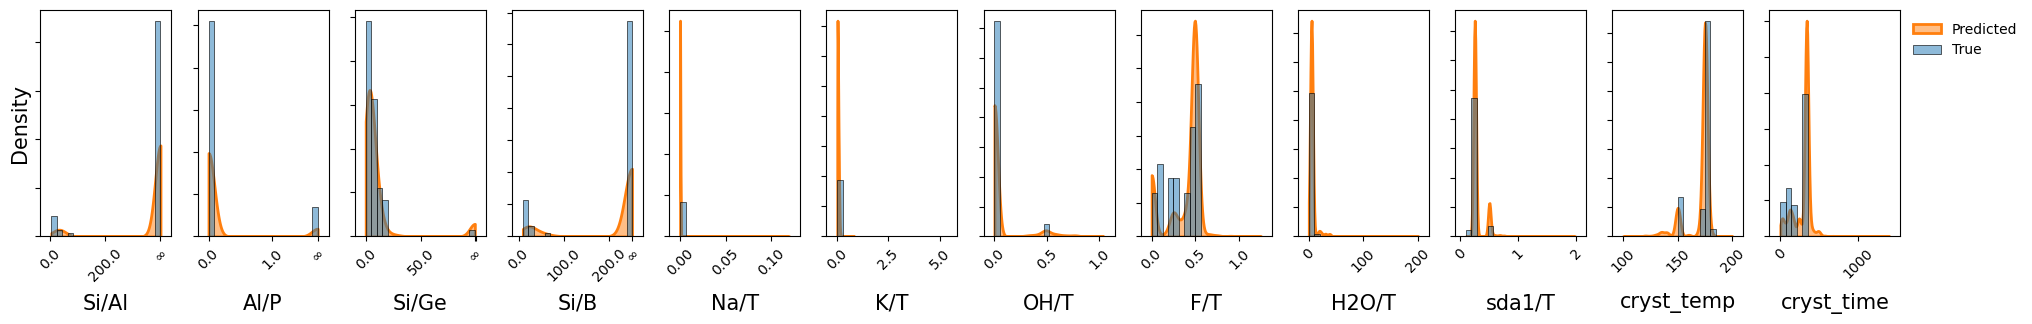

In [ ]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='BEC')

### B) Zeolite-OSDA system

Calculating metrics for zeolite-OSDA systems...
CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 1.1972627639770508
WSD: 0.2987743059158537


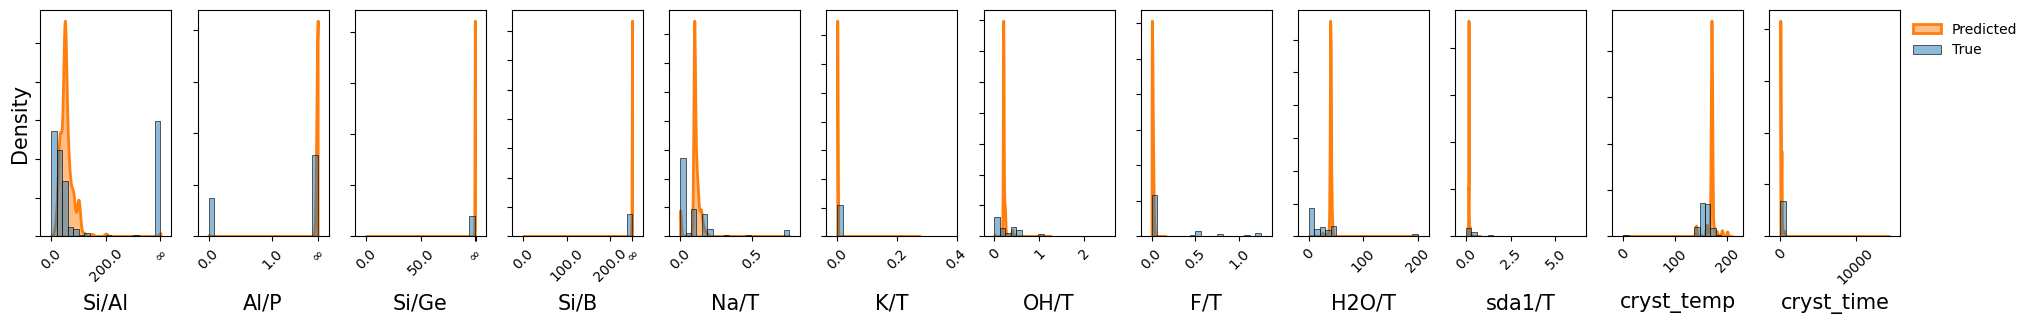

AEL CCCNCCC
MMD: 1.327920913696289
WSD: 0.3401971487012297


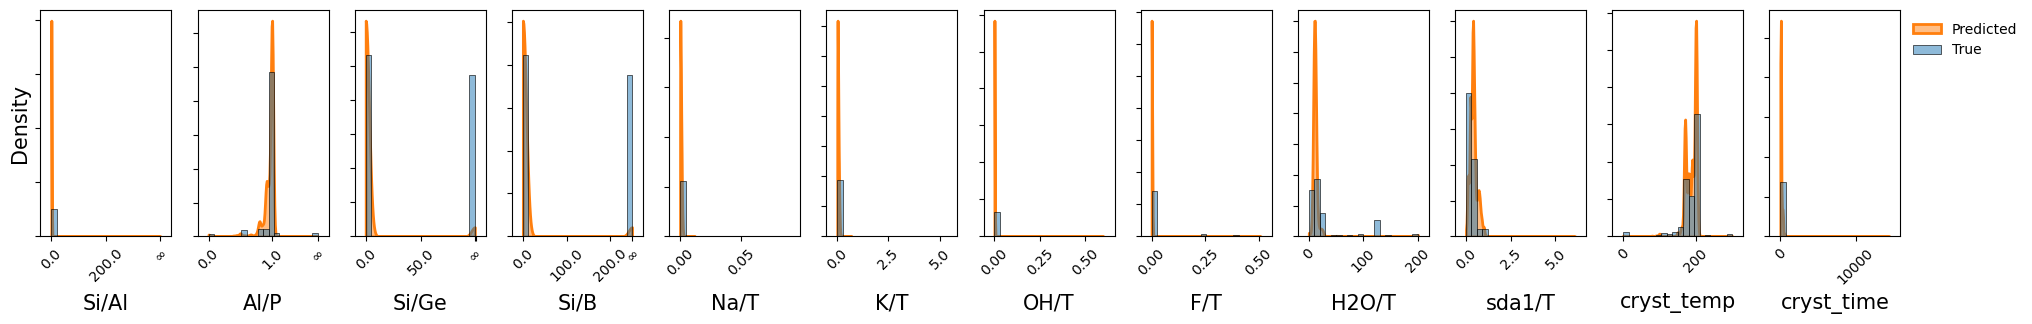

CHA OSDA-free
MMD: 1.0506505966186523
WSD: 0.12325193967392988


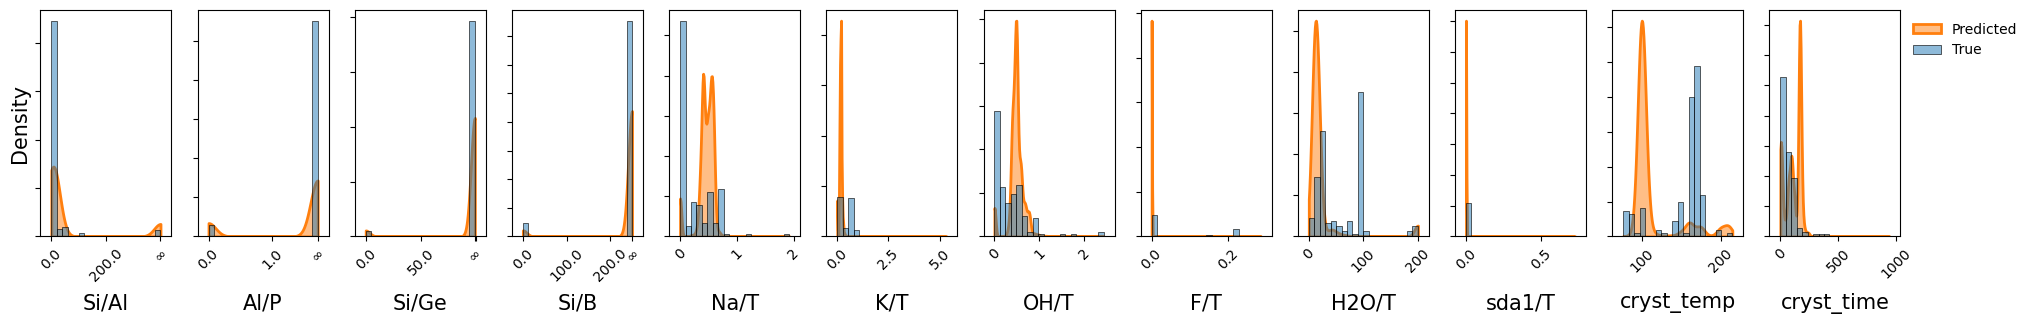

MFI OSDA-free
MMD: 0.4357109069824219
WSD: 0.047703861414584416


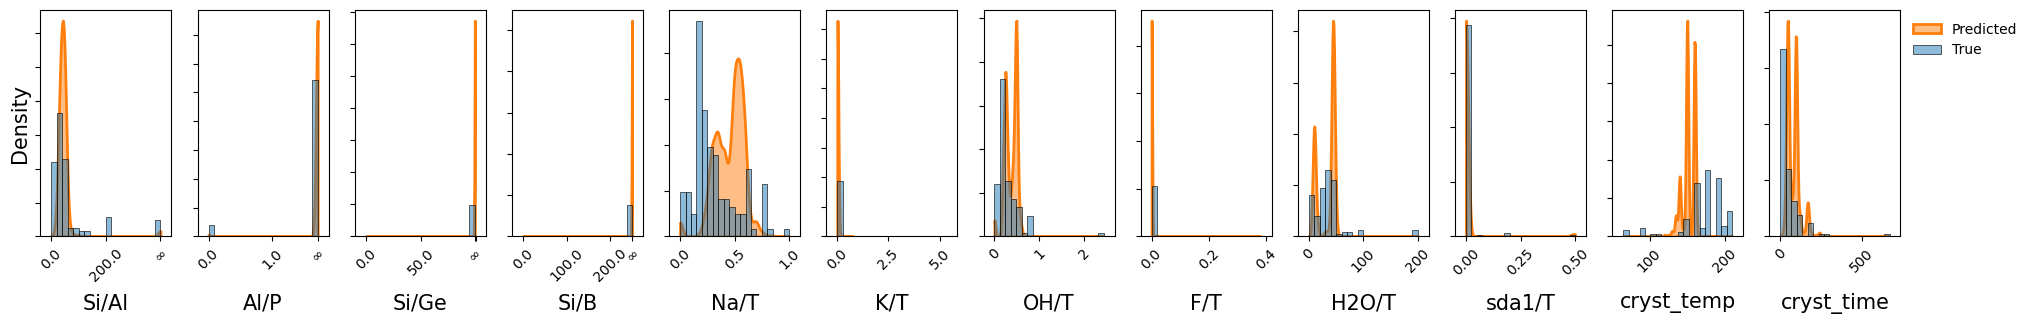

CHA CCN(CC)CC
MMD: 2.3454065322875977
WSD: 0.674735315149269


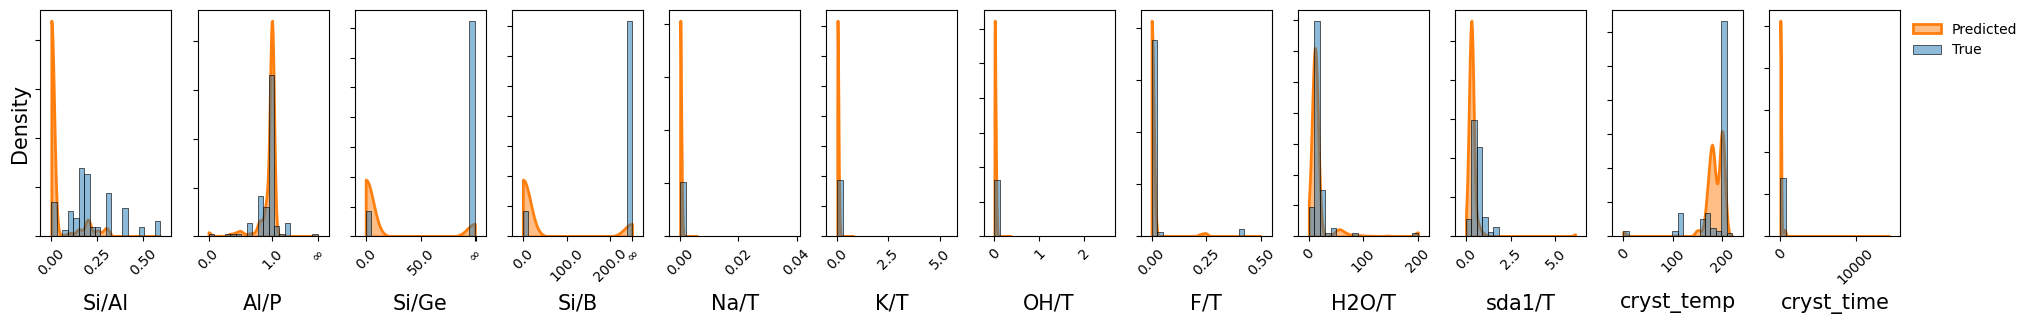

LTA C[N+](C)(C)C
MMD: 1.2140007019042969
WSD: 0.2985969448563134


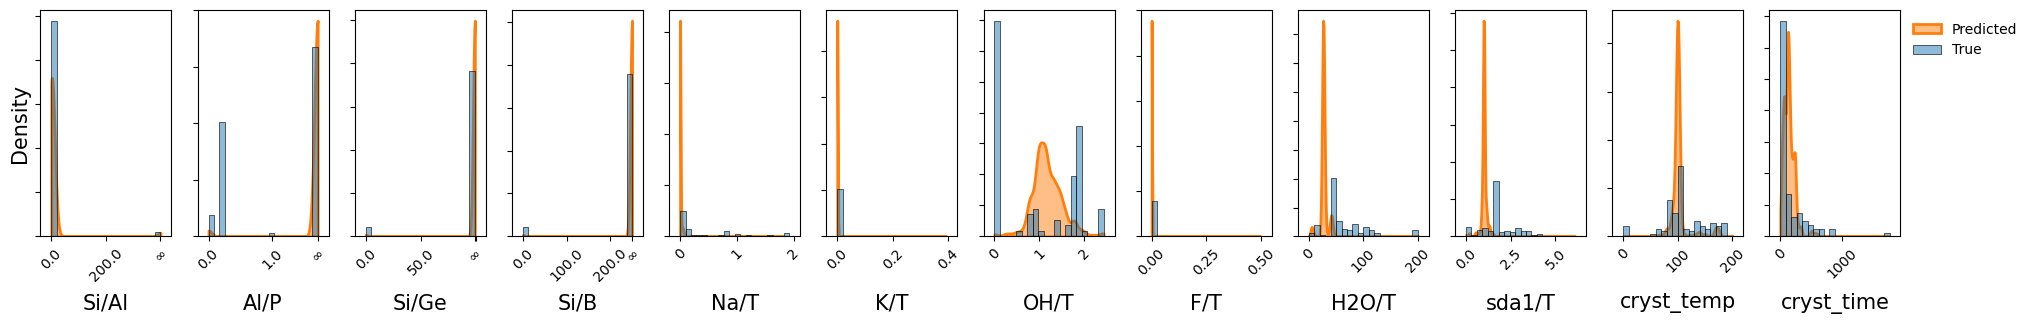

MEL CCCC[N+](CCCC)(CCCC)CCCC
MMD: 1.1502008438110352
WSD: 0.5297046074943357


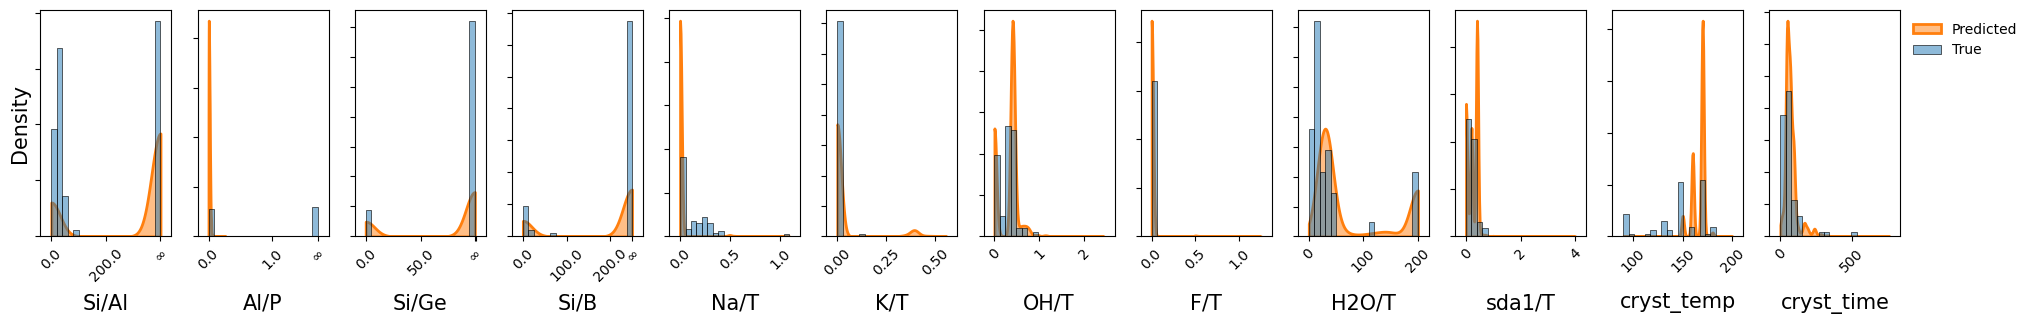

CHA C1COCCN1
MMD: 1.8187036514282227
WSD: 0.3777895334883218


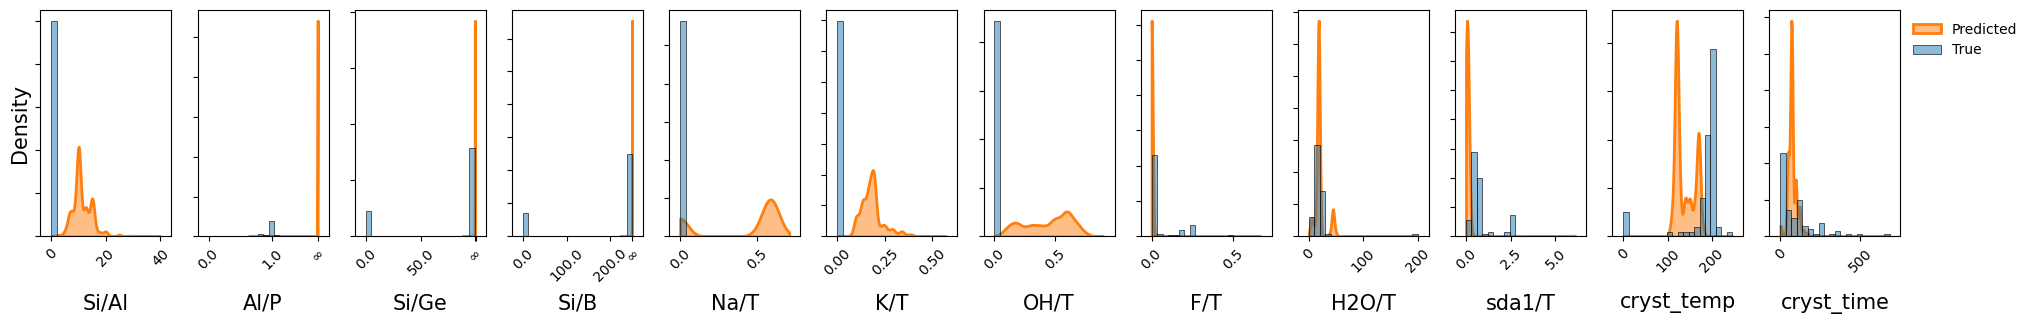

ATO CCCNCCC
MMD: 1.4608898162841797
WSD: 0.04634663722818201


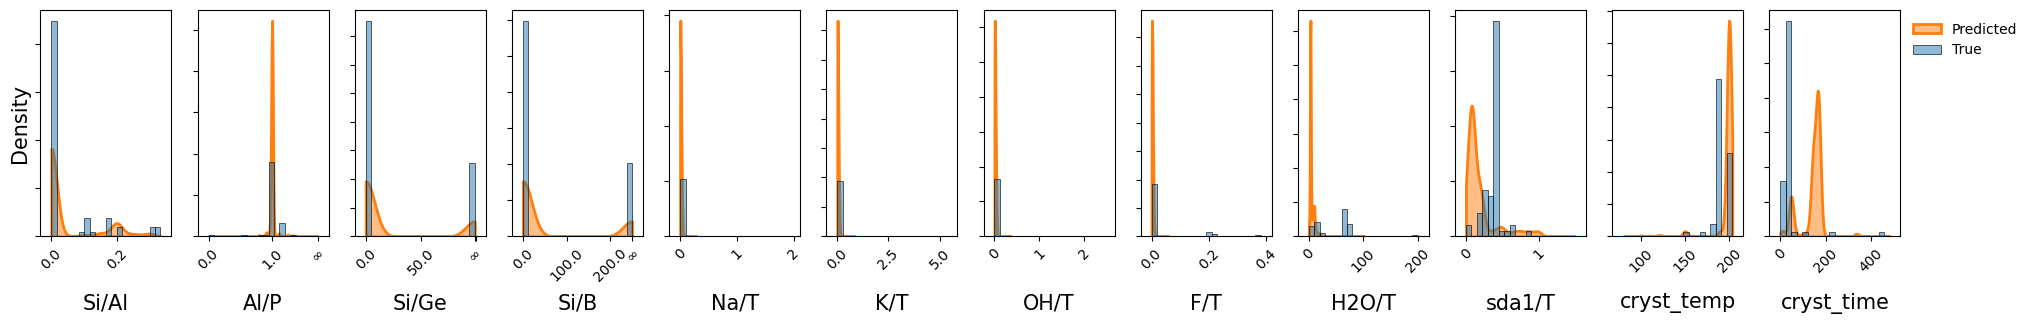

IWR C[N+](C)(C)CCCCCC[N+](C)(C)C
MMD: 1.3135442733764648
WSD: 0.31332148817404404


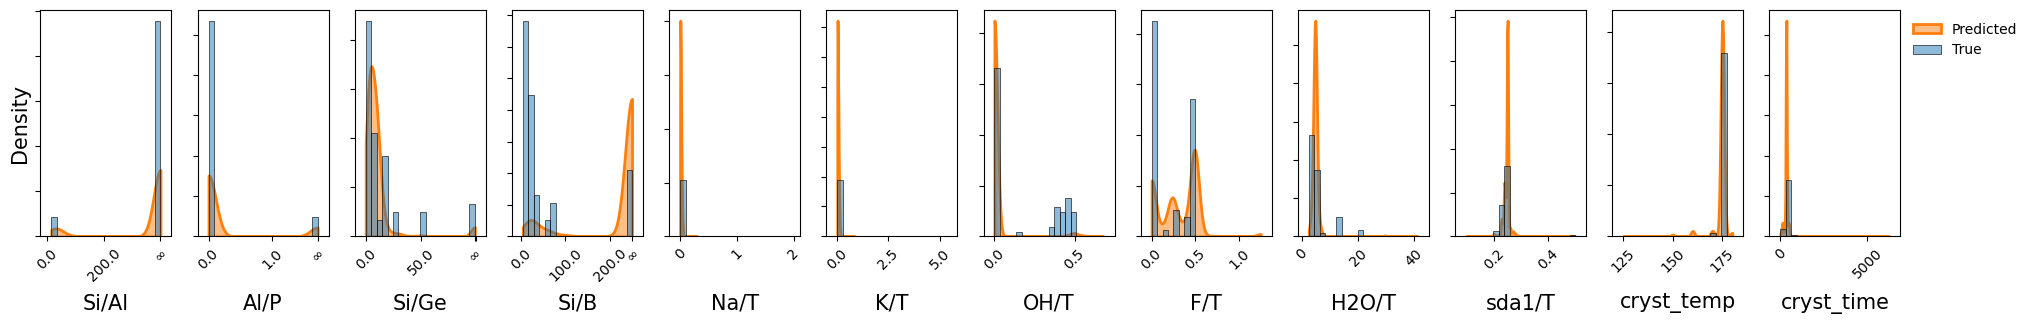

LTA C1COCCN2CCOCCOCCN(CCO1)CCOCCOCC2
MMD: 0.48653125762939453
WSD: 0.1319349452123295


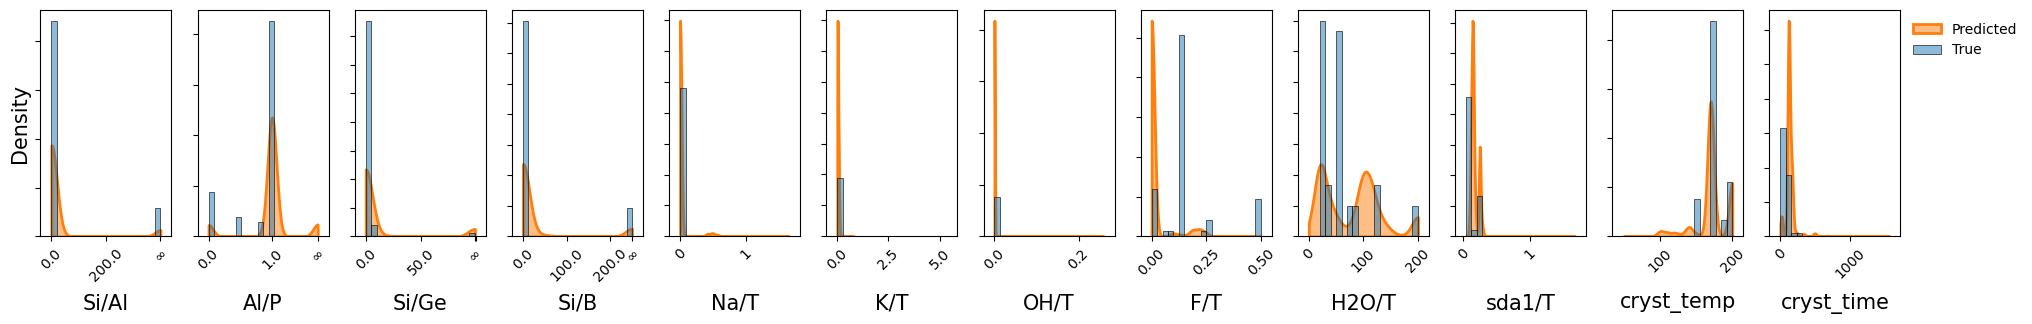

IMF C[N+]1(CCCCC[N+]2(C)CCCC2)CCCC1
MMD: 2.2346839904785156
WSD: 0.3312211607808673


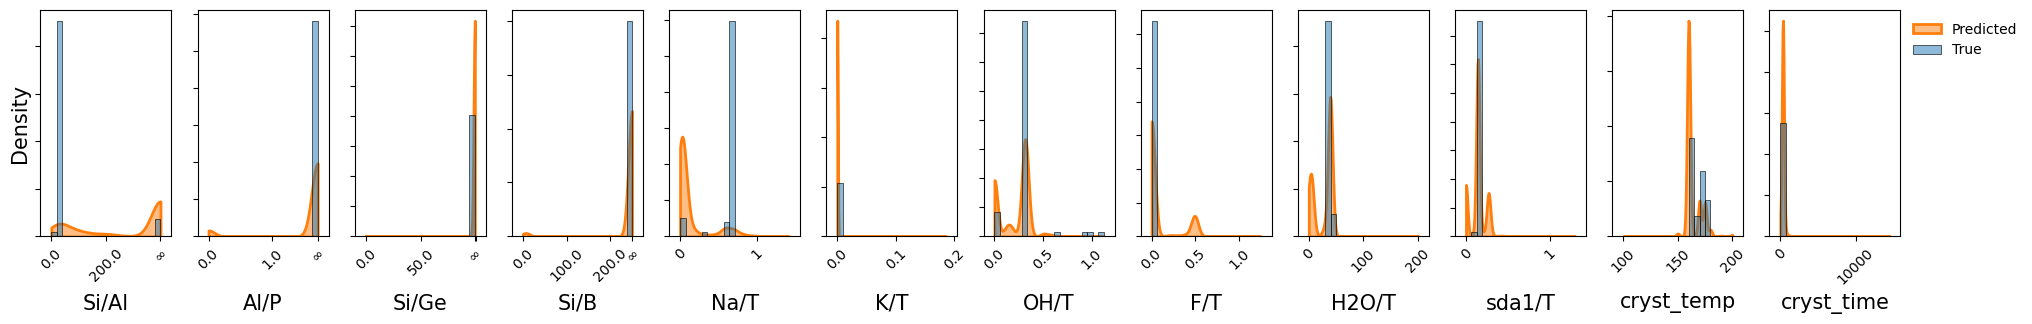

IWR CC[N+]1(CC)CC2C3C(C)=CC(C)(C2C1)C1C[N+](CC)(CC)CC31
MMD: 0.4310789108276367
WSD: 0.191707074616986


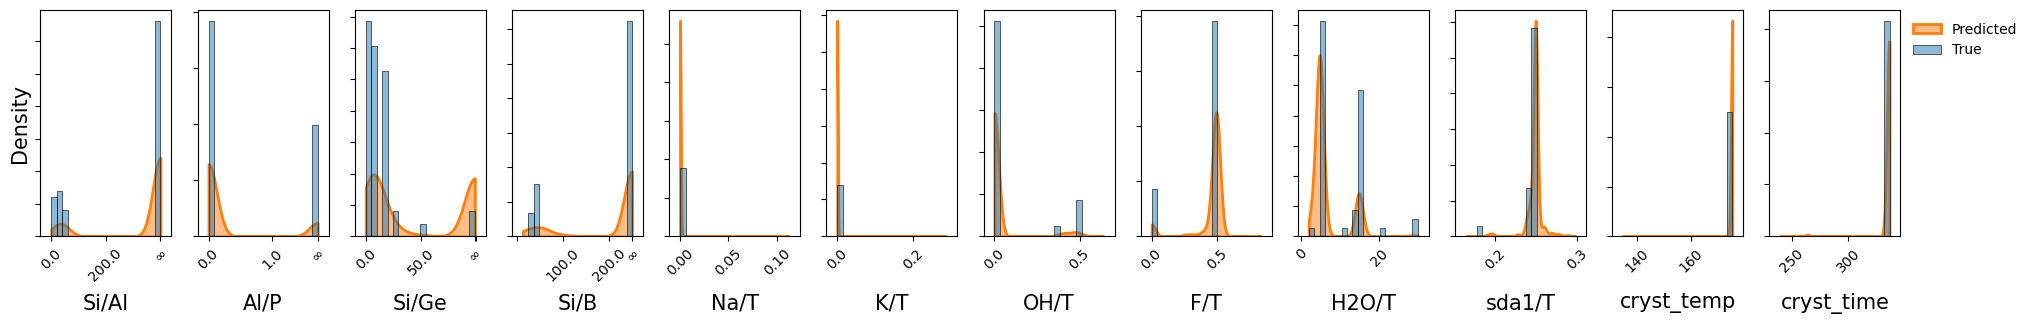

LEV C[N+]12CCC(CC1)CC2
MMD: 0.5735864639282227
WSD: 0.2270042765122202


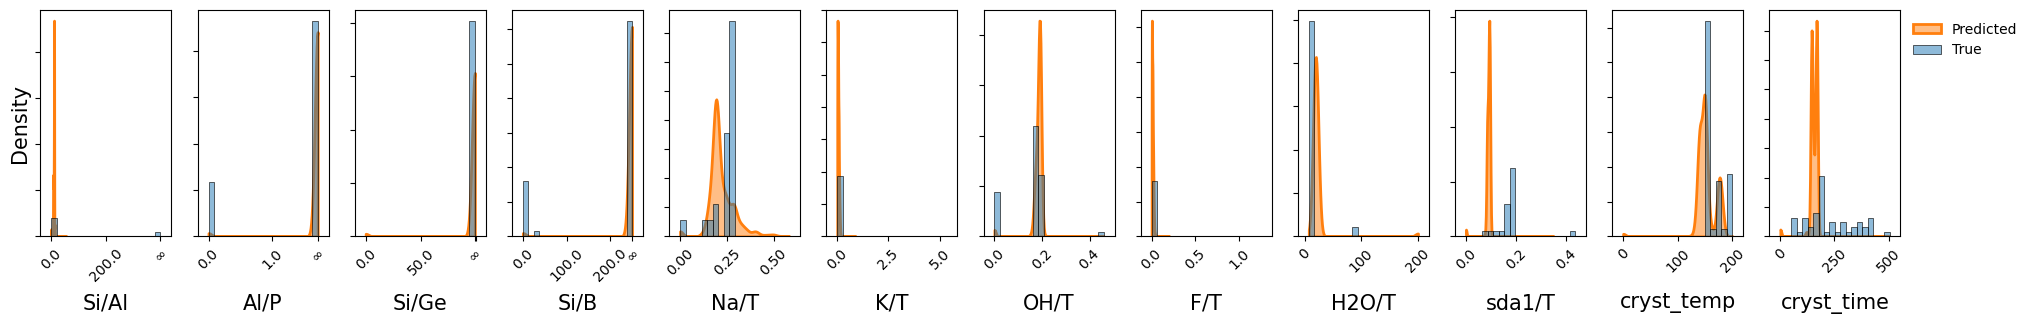

AFI CCCN(CCC)CCC
MMD: 0.8824052810668945
WSD: 0.3069476883049709


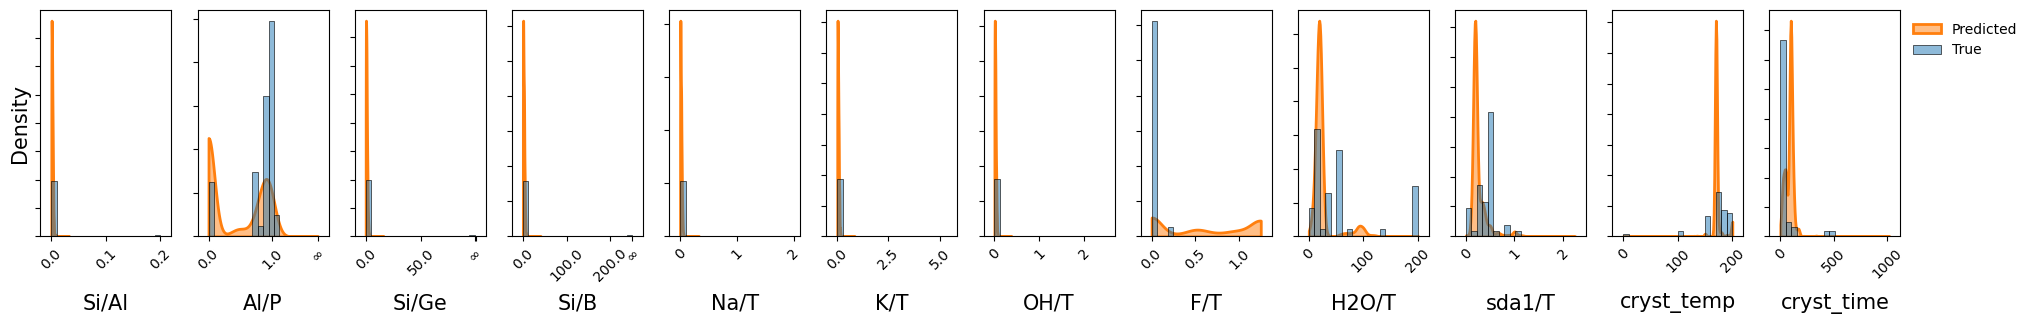

BEC C[N+](C)(C)CCCCCC[N+](C)(C)C
MMD: 0.19211769104003906
WSD: 0.01666041080824173


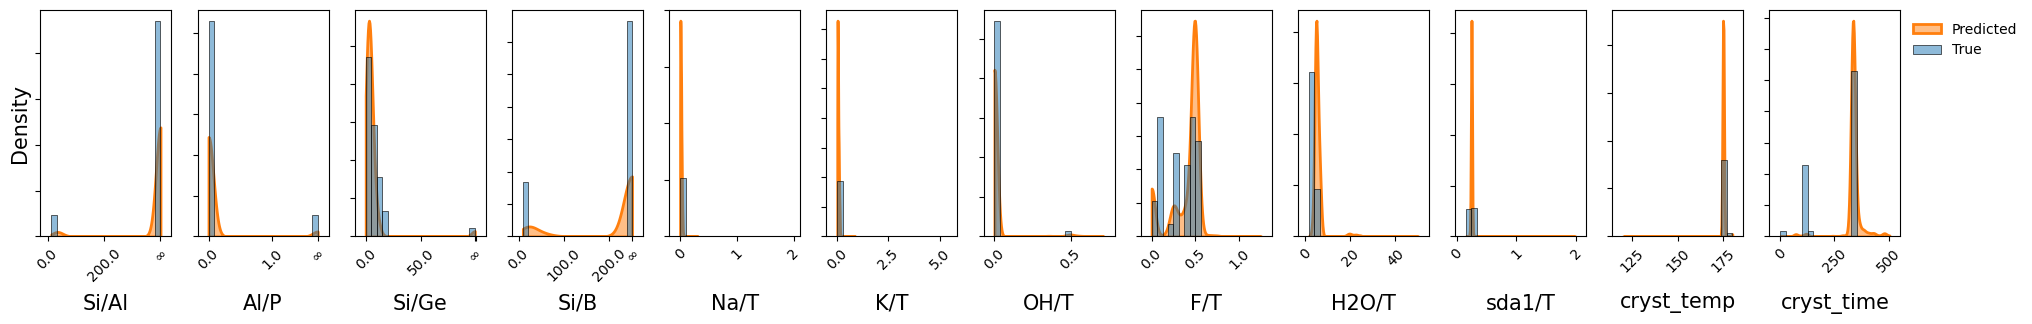

MAZ OSDA-free
MMD: 0.35481929779052734
WSD: 0.04136729528244789


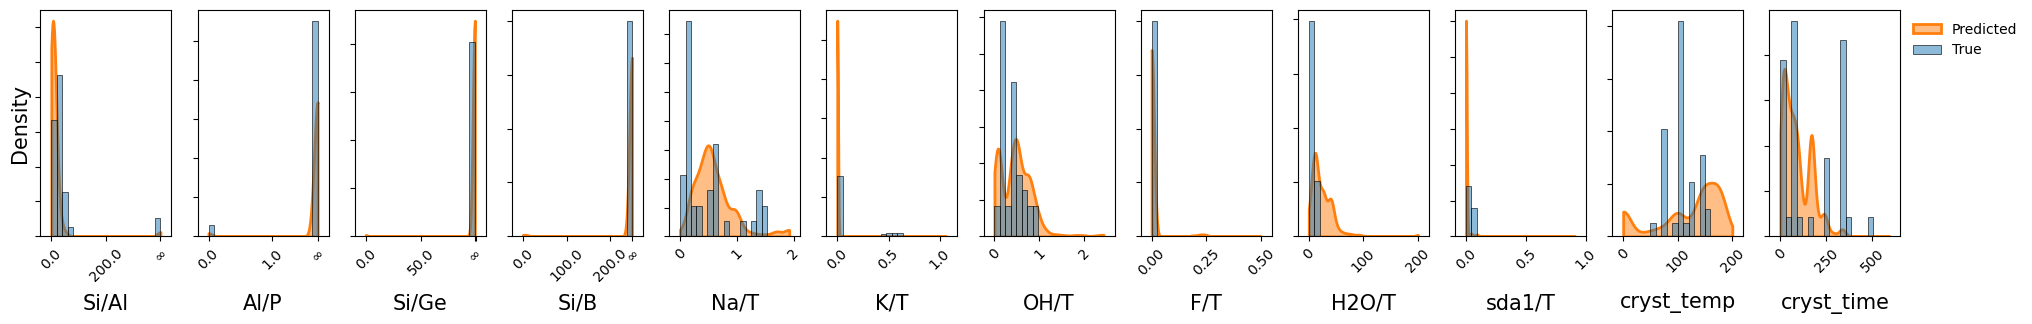

MWW C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 2.939452648162842
WSD: 0.8190678629281902


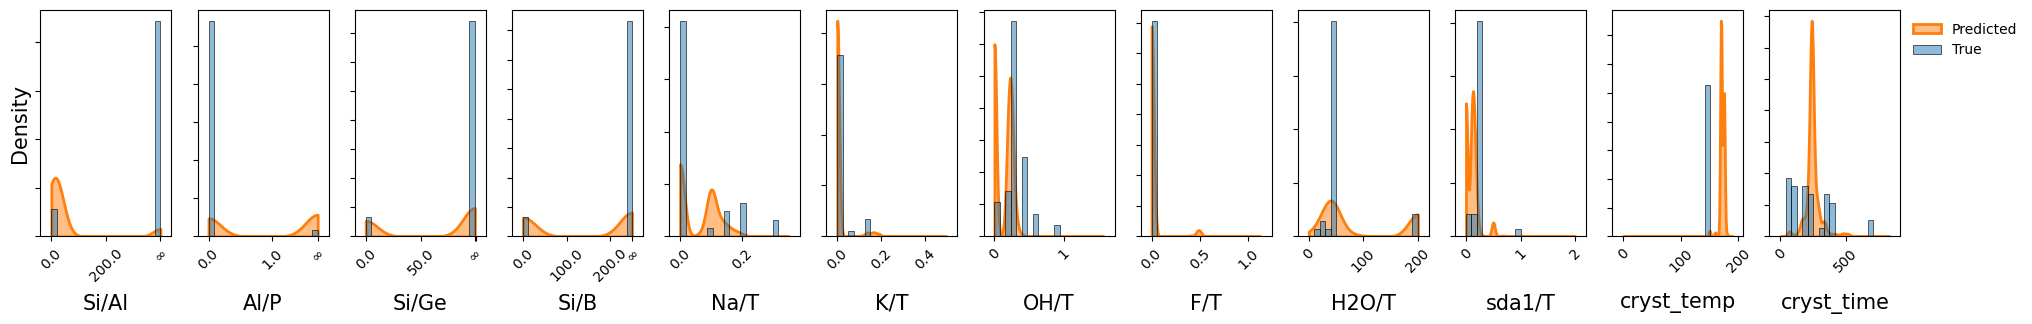

AEN CC[n+]1ccn(C)c1C
MMD: 1.8121509552001953
WSD: 0.08886613870352576


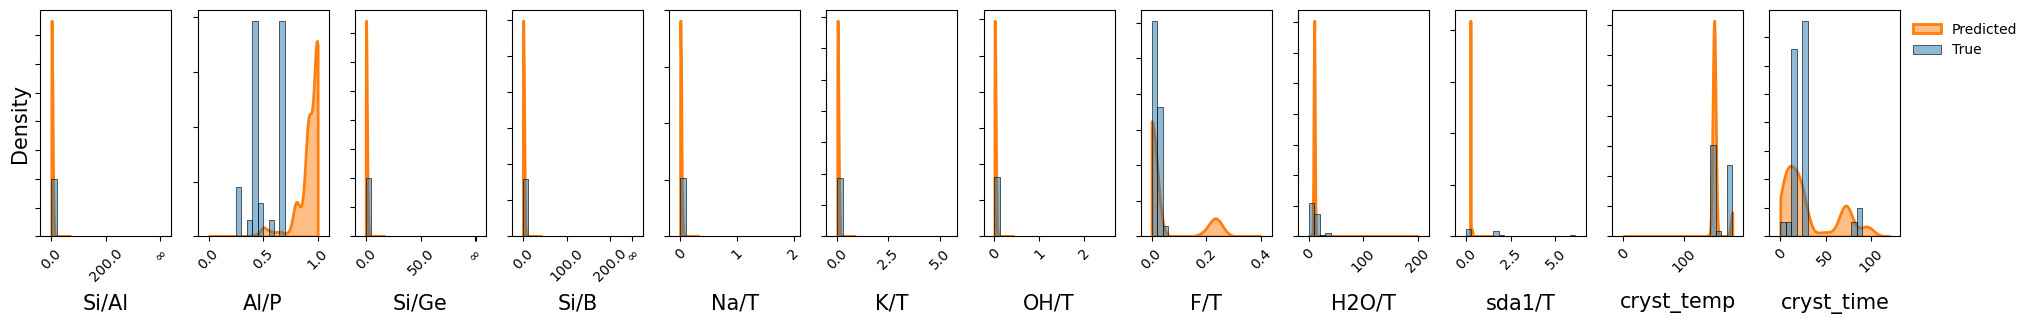

FAU C1COCCOCCOCCOCCOCCO1
MMD: 0.4022846221923828
WSD: 0.08399202873573641


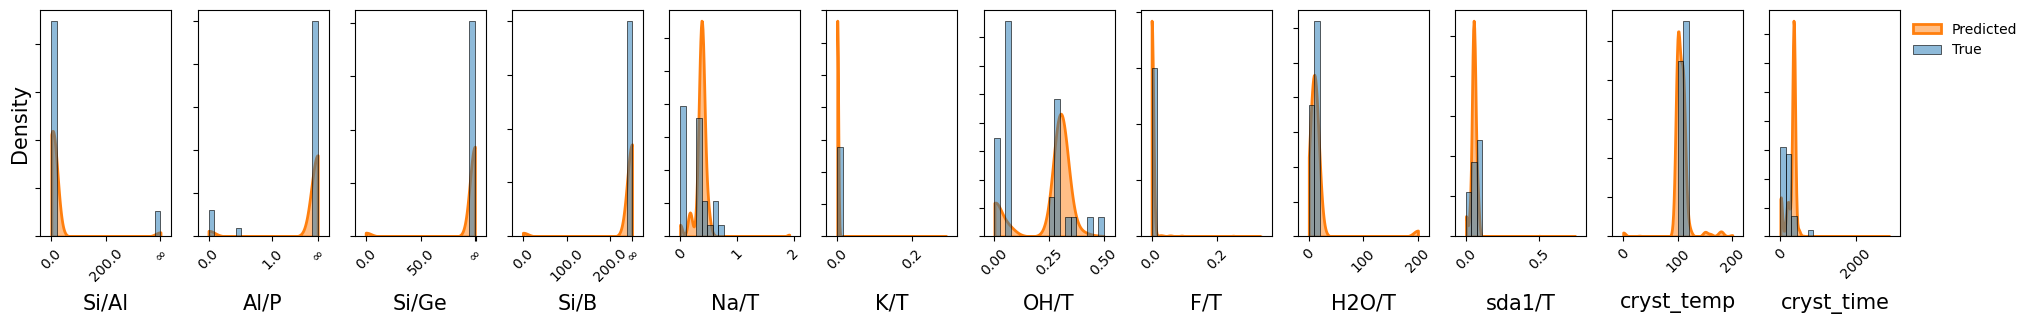

FAU CC[N+](CC)(CC)CC
MMD: 1.282827377319336
WSD: 0.1161423173655344


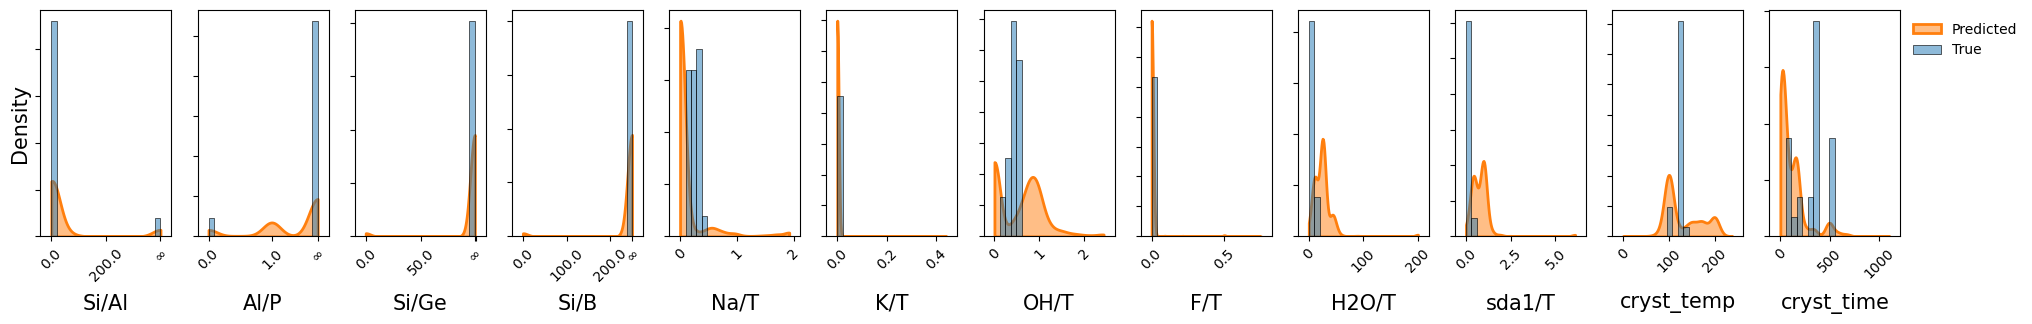

UOV C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C
MMD: 2.563845634460449
WSD: 0.8945527826540395


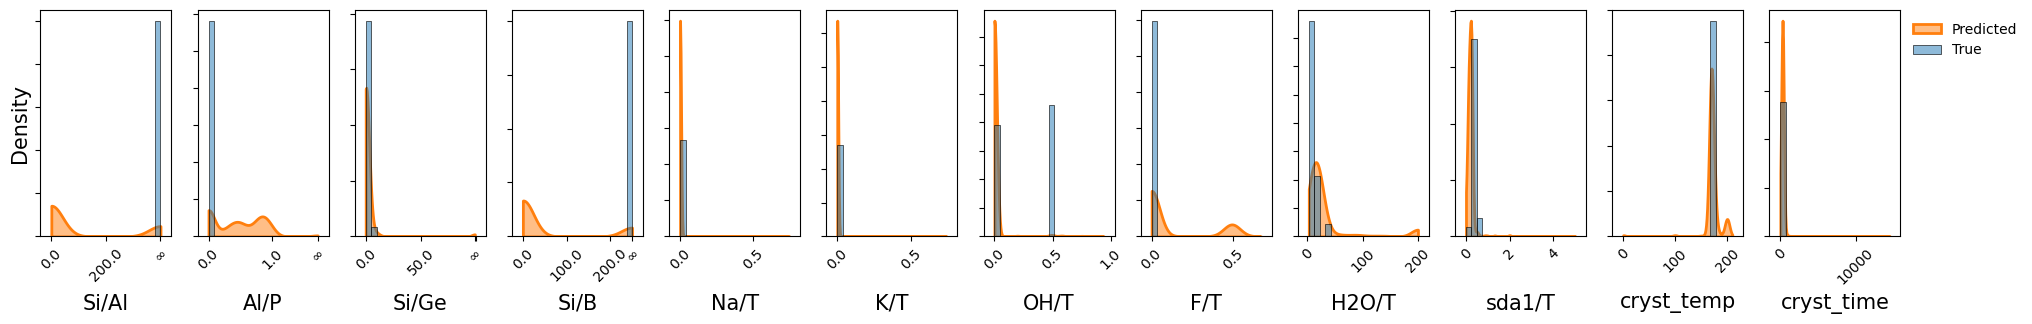

PHI OSDA-free
MMD: 0.6852970123291016
WSD: 0.19940523350272005


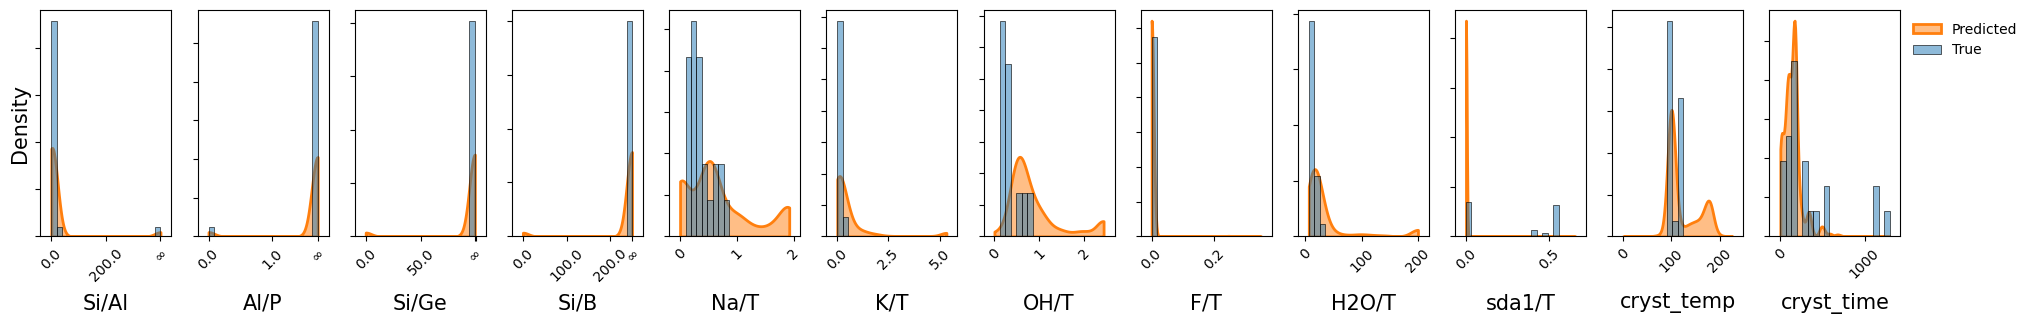

GIS CCCNCCC
MMD: 3.997525215148926
WSD: 1.143721711556277


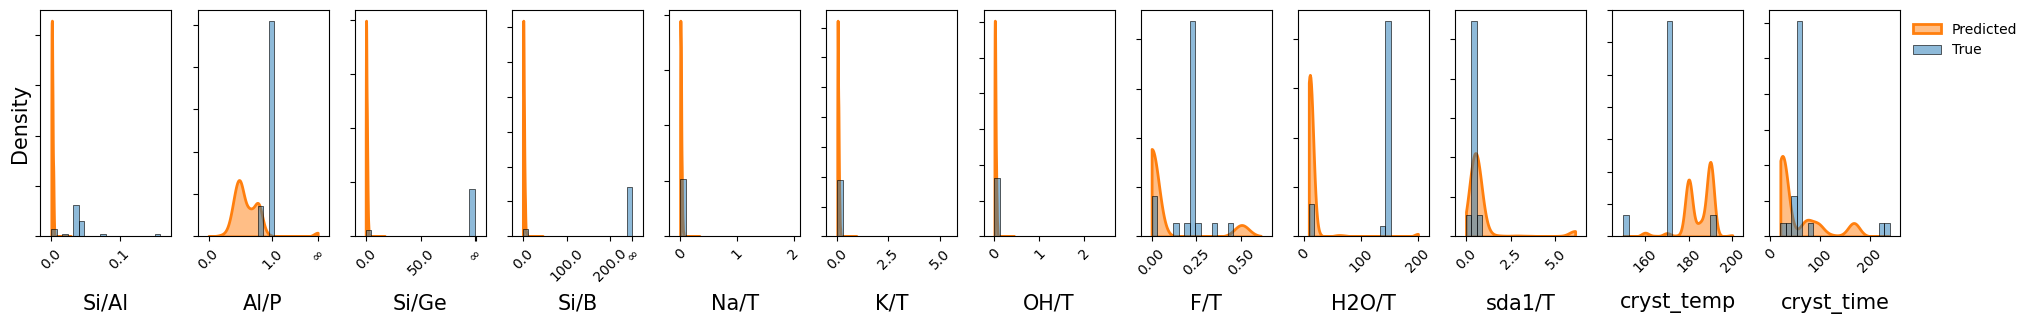

LEV C[N+]1(C)CCCCC1
MMD: 0.9131946563720703
WSD: 0.23401408664229095


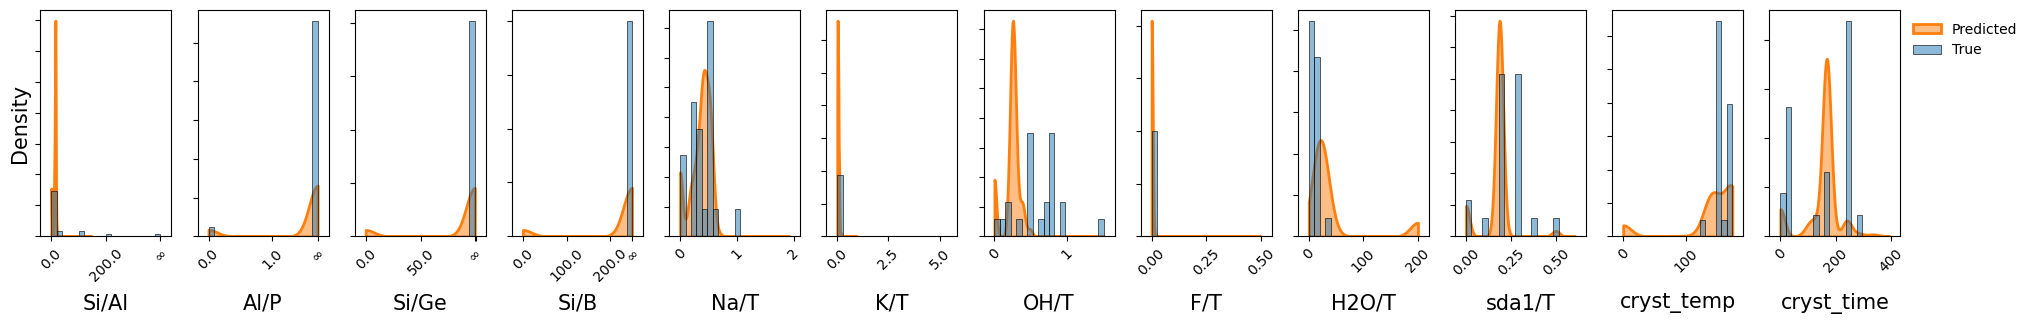

ITT C[N+](C)(C)CCCCCC[N+](C)(C)C
MMD: 1.390134334564209
WSD: 0.7727469369054745


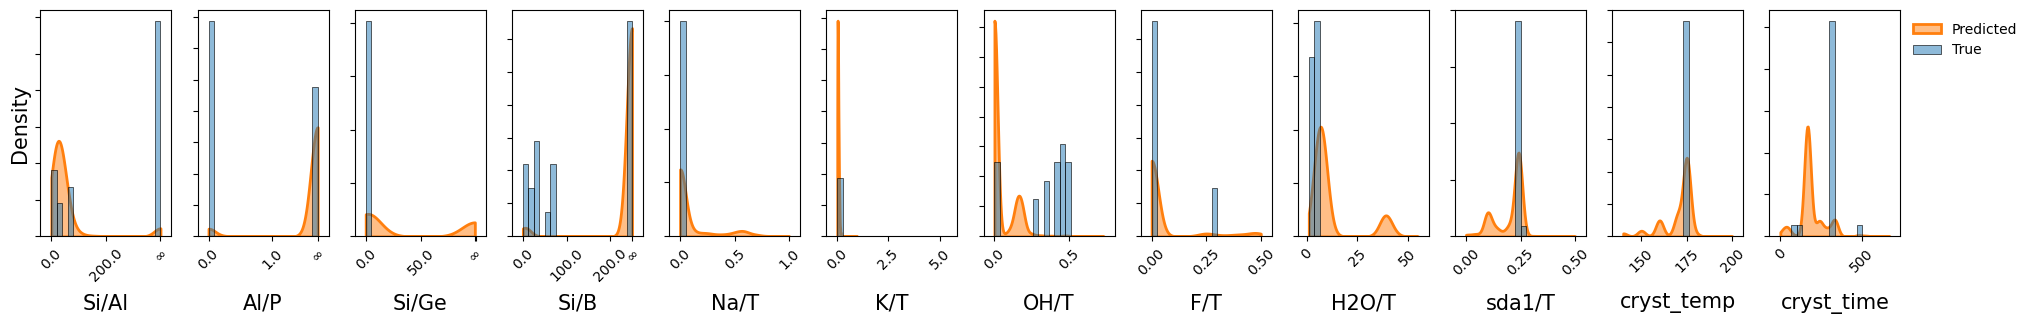

FER C[N+]1(Cc2ccccc2)CCCC1
MMD: 0.10133743286132812
WSD: 0.09583718784434891


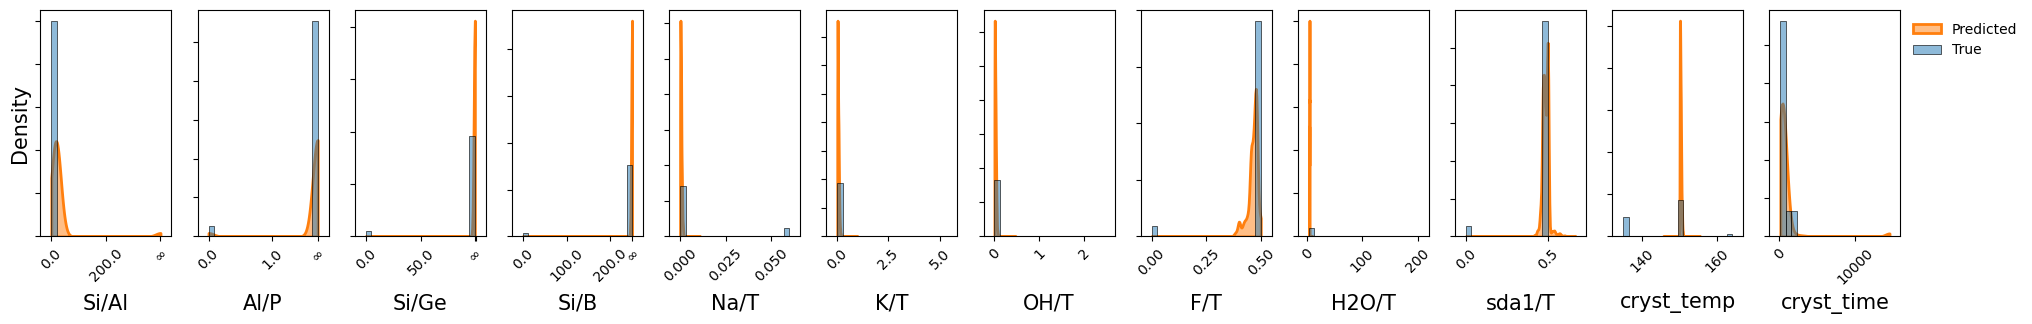

ITG C[N+]1(C)CCC([N+]2(C)CCCC2)CC1
MMD: 1.3686408996582031
WSD: 0.3106805063083887


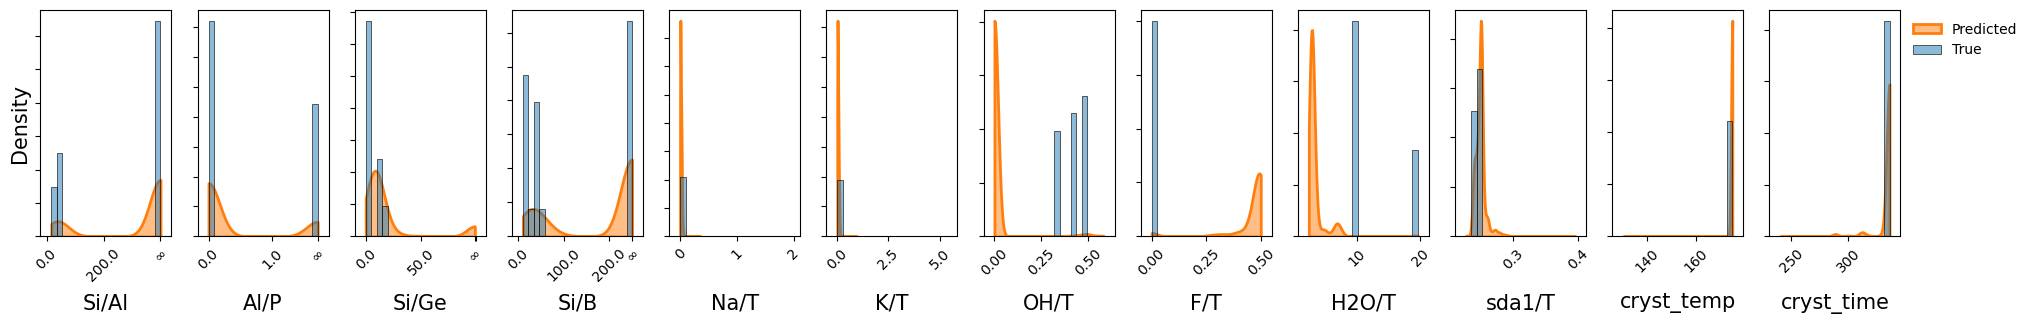

BEA C(CCCC[N+]12CCC(CC1)CC2)CCC[N+]12CCC(CC1)CC2
MMD: 3.3176345825195312
WSD: 0.7689892420904643


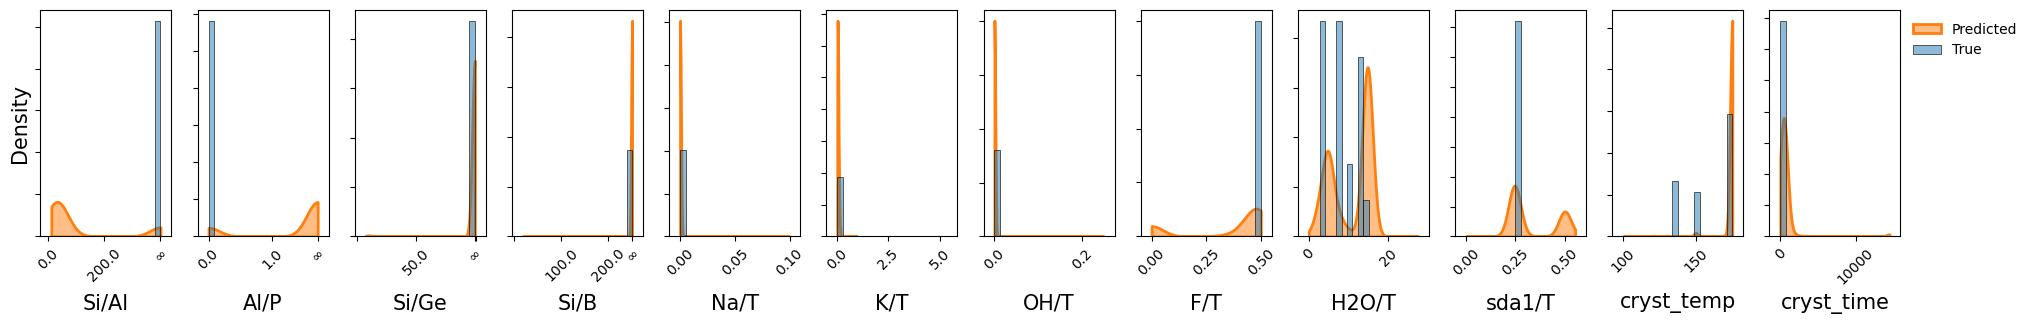

SAV C1CNCCCNCCNCCNC1
MMD: 2.9005613327026367
WSD: 1.0035255027251735


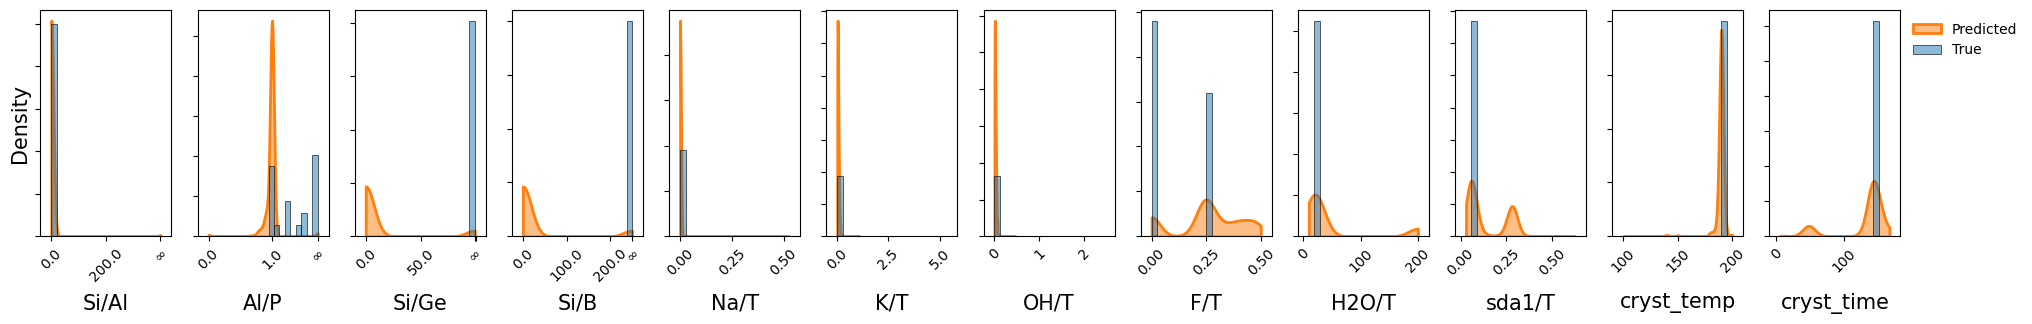

AEI CC[P+](CC)(CC)CC
MMD: 4.0323262214660645
WSD: 1.2382236332679173


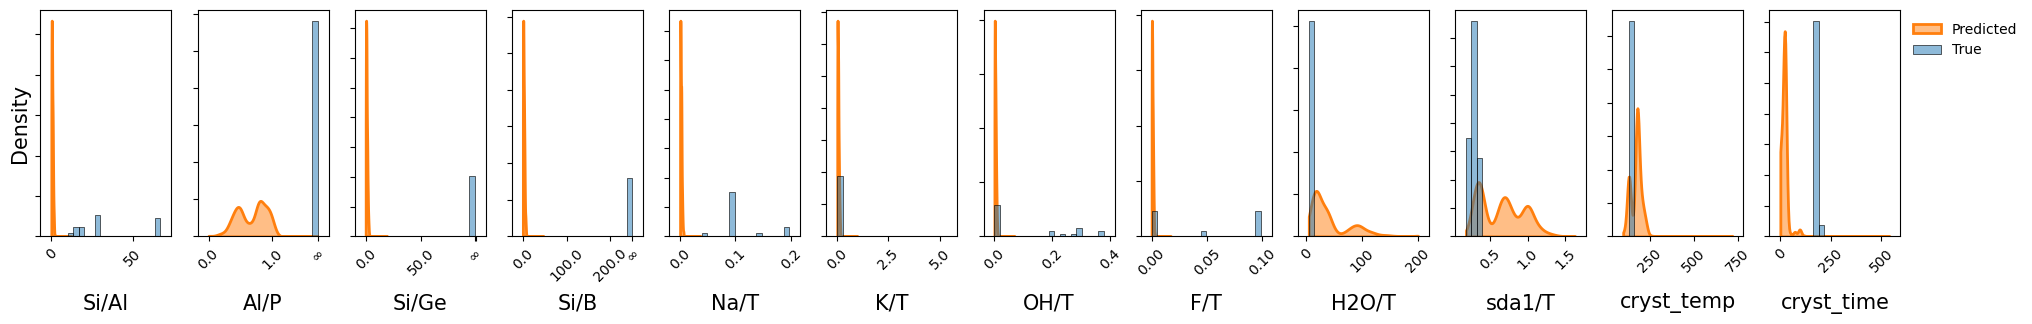

AFI C[N+]12CCCC[C@@H]1[C@H]1C[C@@H](C2)[C@@H]2CCCCN2C1
MMD: 0.1532611846923828
WSD: 0.15762688754688564


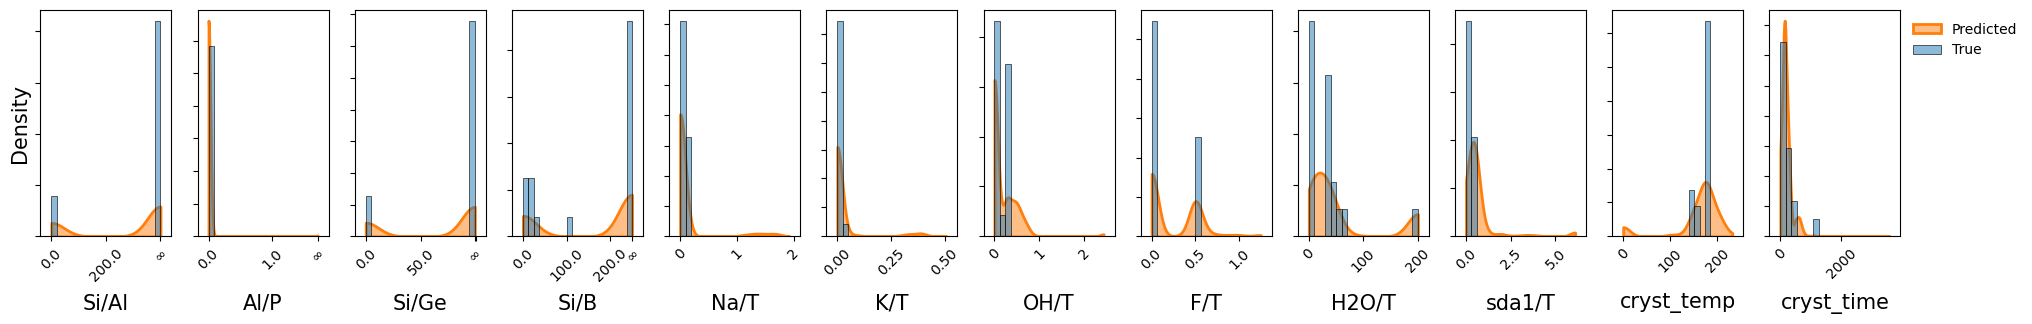

NSI c1cc(-c2ccncc2)ccn1
MMD: 2.478959083557129
WSD: 1.4056883324420764


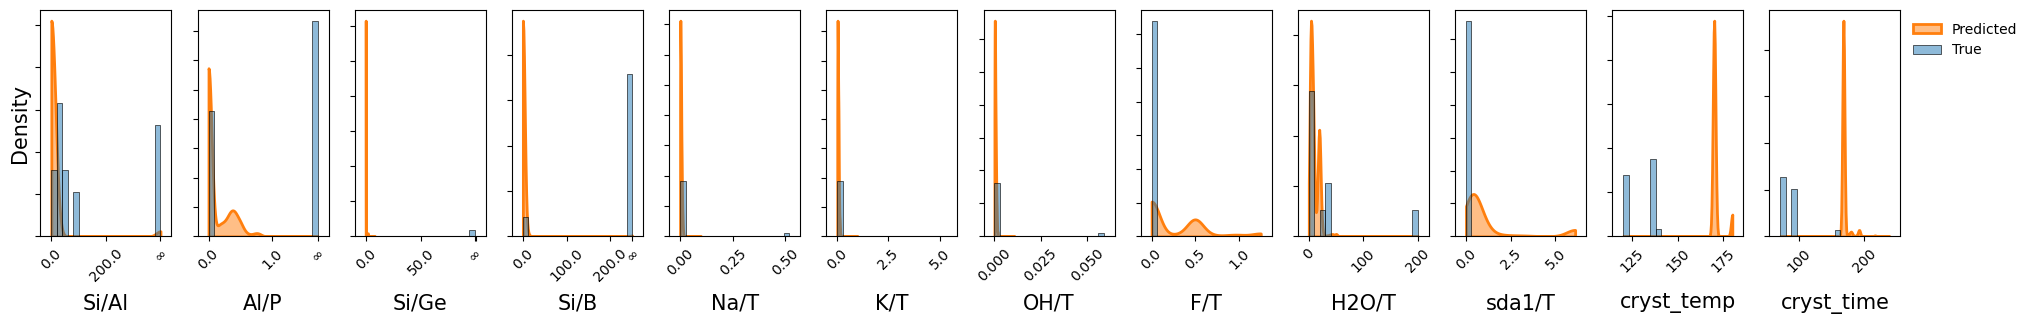

CON CC1(C)[C@H]2CC[C@@H](C[N+](C)(C)C)[C@@H]1C2
MMD: 1.2608652114868164
WSD: 0.3387823155261922


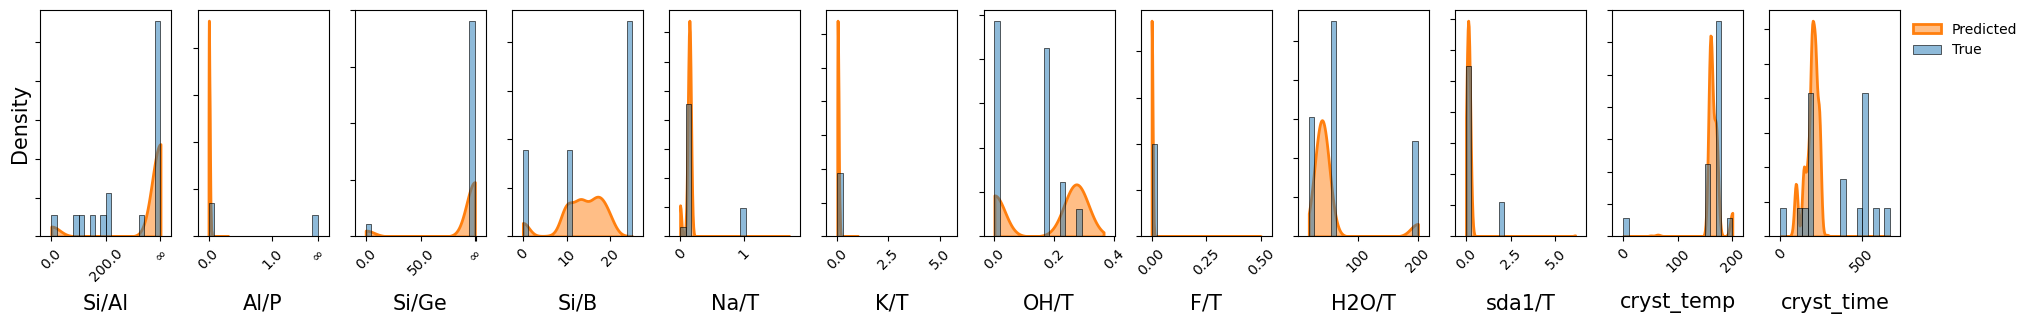

FER C1CNCCN1
MMD: 0.37427711486816406
WSD: 0.07267525578832448


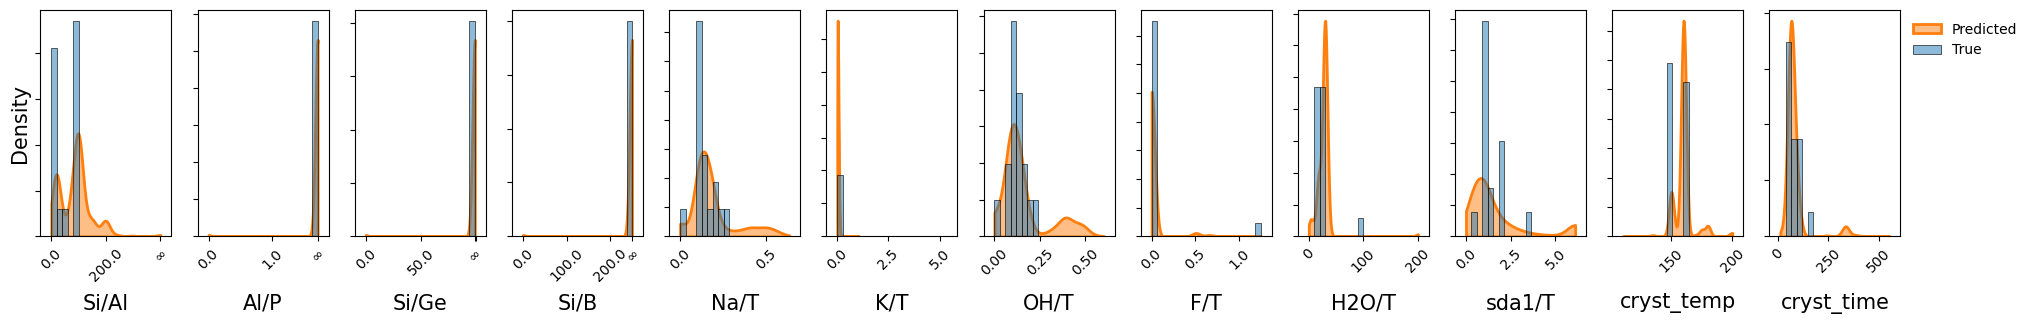

MTW C[N+]1(Cc2ccccc2)CCC(CCCCCC2CC[N+](C)(Cc3ccccc3)CC2)CC1
MMD: 0.8527650833129883
WSD: 0.007344717230431286


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


ValueError: max must be larger than min in range parameter.

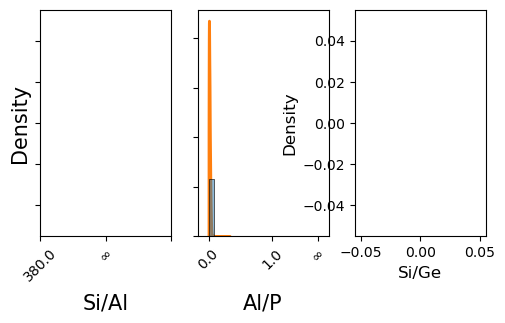

In [ ]:
_, _ = eval_zeolite_osda(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=None)

CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 1.1972627639770508
WSD: 0.2987743059158537


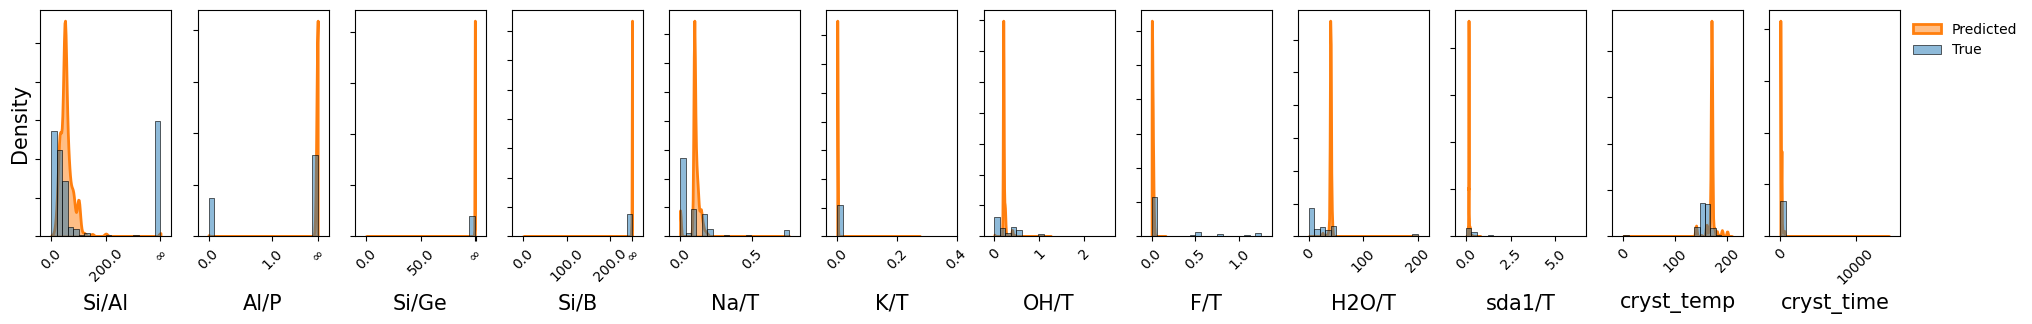

In [ ]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='CHA', osda='C[N+](C)(C)C12CC3CC(CC(C3)C1)C2')